In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
import math
from scipy import stats as s
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
from pandas.tseries.holiday import USFederalHolidayCalendar


#**Chapter 1: Data Visualization**



In [ ]:
local_df = pd.read_csv('./drive/MyDrive/Local_Coffee_Stores_Final.csv')
corporate_df = pd.read_csv('/content/drive/My Drive/National_Coffee_Stores_Final.csv')


### Data Cleansing, already done

In [ ]:
'''
# we can get rid of Category1 because if is all food
local_df.drop('CategoryLvl1Desc', 1,  inplace=True)
# droping group ID because 'not applicable'
local_df.drop('GroupID', 1, inplace=True)
# this is a binary value
local_df['StockedOut'].unique()
local_df.drop('ItemType', 1, inplace=True)
local_df.drop('PLU', 1, inplace=True)
# checking for any null values in the df
local_df[local_df.isnull().any(axis=1)]
# there appears to only be NaN values in the Missed Sales Column
# replace all of the NaNs in missed sales with the value 0 
local_df['MissedSales'] = local_df['MissedSales'].fillna(0.0)
local_df.isnull().values.any()
 # might want to change this later just to be an average
 '''
# creating dataframes for each individual store
store18 = local_df[local_df['StoreID'] == 18]
store117 = local_df[local_df['StoreID'] == 117]
store332 = local_df[local_df['StoreID'] == 332]
#store18.to_csv('store18.csv', index=False)
#store117.to_csv('store117.csv', index=False)
#store332.to_csv('store332.csv', index=False)

In [ ]:
corporate_df['CategoryLvl1Desc'].unique()

#here we created the shortened csv file with only our data

to_remove = ['Caramel Cake Pop', 'Overnight Oats', 'Egg White Pesto Wrap', 'Pressed Juicery Spicy Greens w Ginger']
corporate_df.drop(corporate_df[corporate_df['Description'].isin(to_remove)].index, inplace = True)
unique_products =  corporate_df['Description'].unique()
unique_products.sort()
our_products = unique_products[ : 13]
new_corporate_data = corporate_df[corporate_df['Description'].isin(our_products)]
new_corporate_data.shape
new_corporate_data.to_csv('corporate_data_group2_final.csv')


'''
Data Cleaning 
'''
# checking for any null values in the df
corporate_df[corporate_df.isnull().any(axis=1)]
# there appears to only be NaN values in the Missed Sales Column
# replace all of the NaNs in missed sales with the value 0 
corporate_df['MissedSales'] = corporate_df['MissedSales'].fillna(0.0)

corporate_df.isnull().values.any()

 # might want to change this later just to be an average






False

### Box Plot

In [ ]:
def item_statistics(df):

    namesMainData = df['Description'].unique()
    store_ID = df['StoreID'].unique()[0]

    for name in namesMainData:
        plt.title(f"StoreID: {store_ID} Average Sold Quantity for {name}")
        data = [df.loc[df['Description'] == name]['SoldQuantity'], df.loc[df['Description'] == name]['EndQuantity'], df.loc[df['Description'] == name]['StockedOut'], df.loc[df['Description'] == name]['MissedSales']]

        plt.boxplot(data)
        bars = (' ', 'SoldQuantity', 'EndQuantity', 'StockedOut', 'MissedSales' )
        y_pos = np.arange(len(bars) )
        plt.xticks(y_pos, bars, fontsize='10' , rotation=90, horizontalalignment='left')
        plt.show()
        print()




#### Store 18

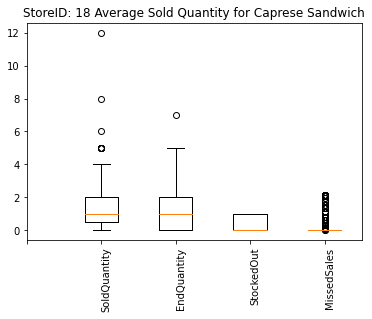

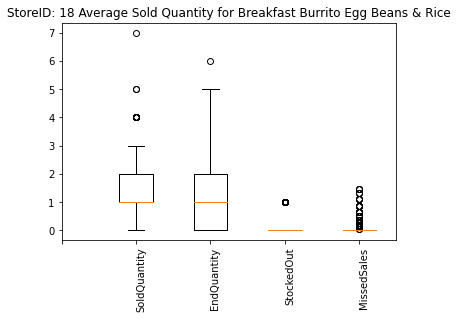

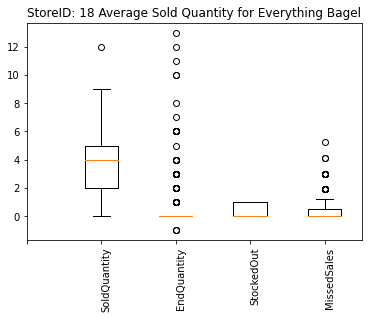

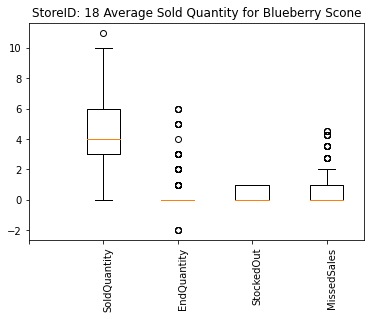

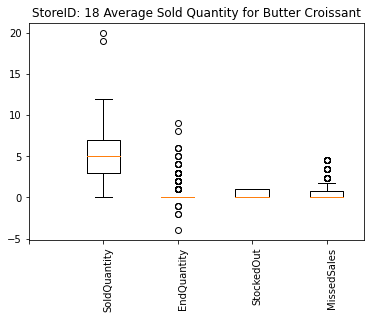

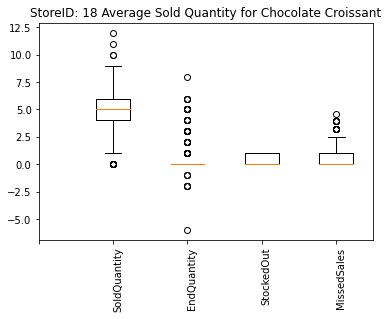

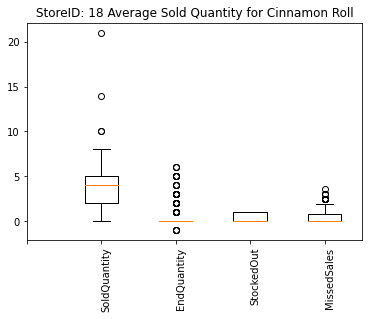

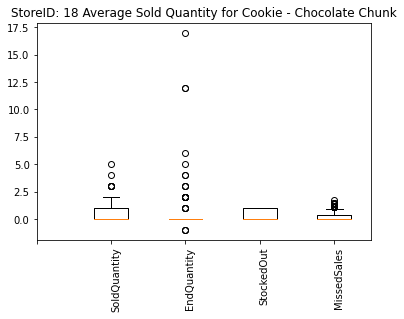

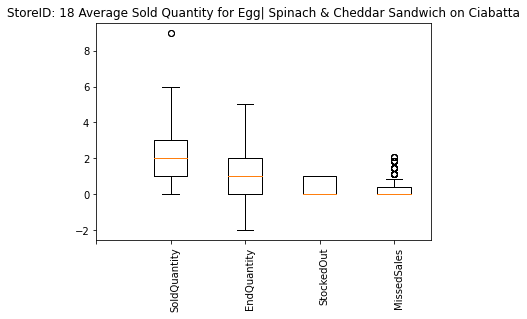

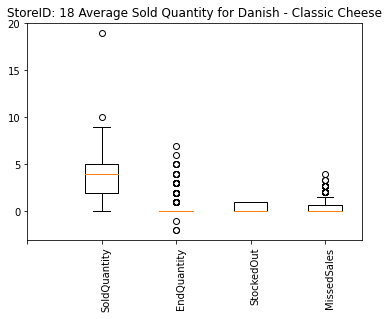

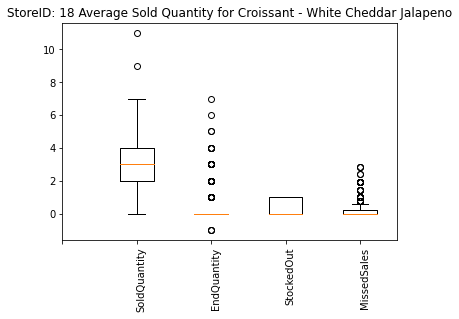

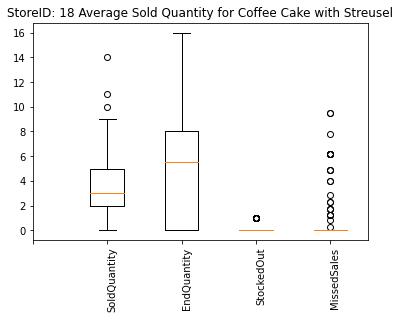

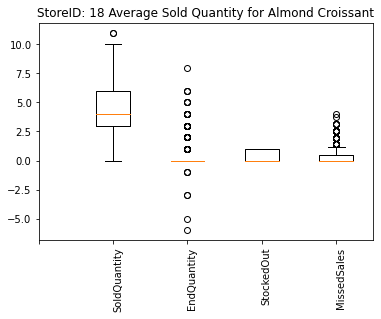

In [ ]:
item_statistics(store18)

#### Store 117

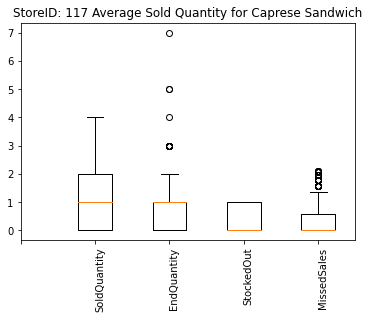

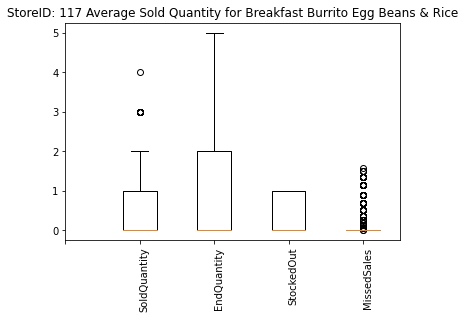

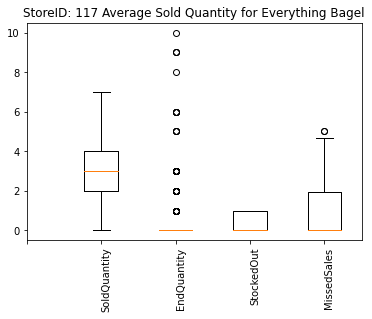

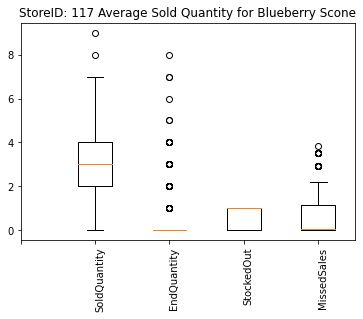

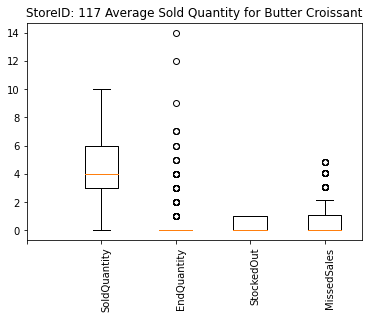

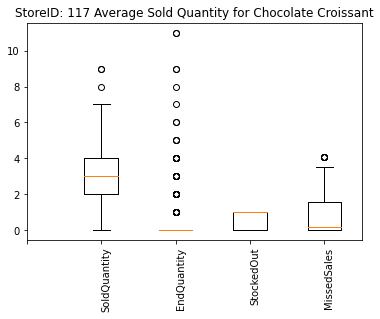

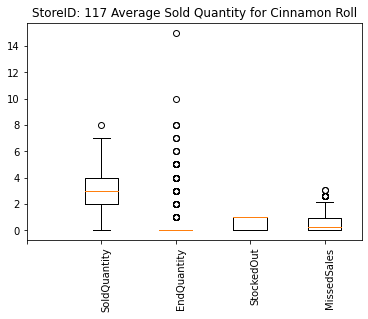

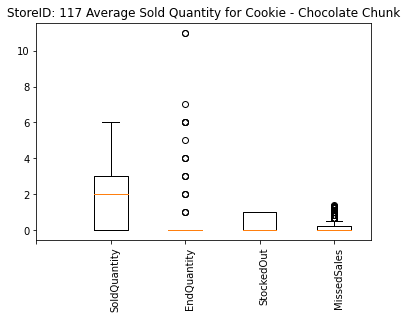

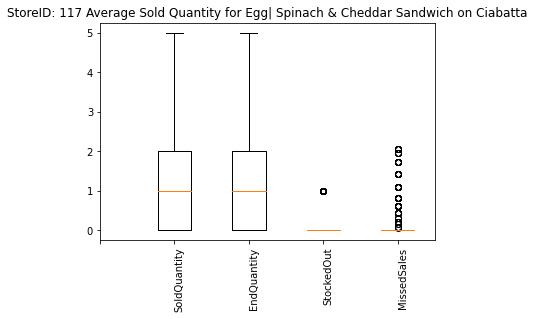

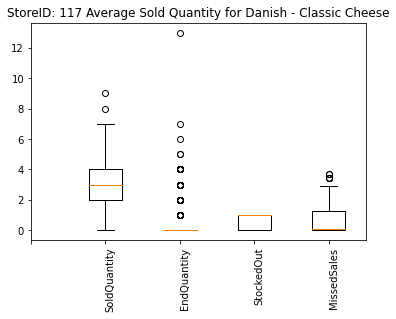

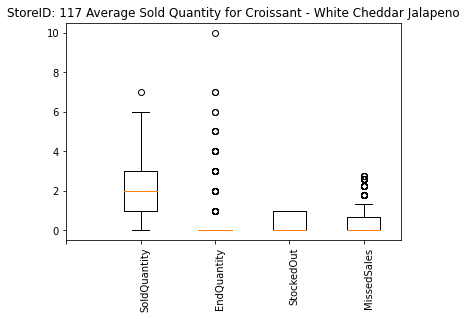

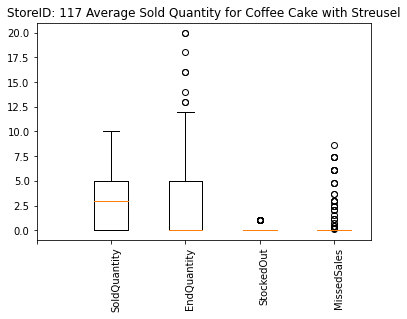

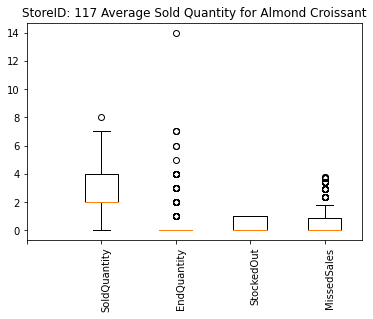

In [ ]:
item_statistics(store117)

#### Store 332

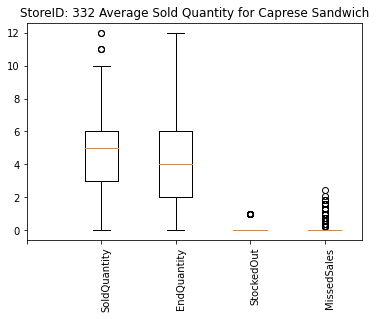

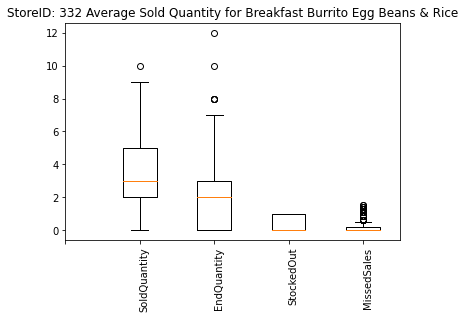

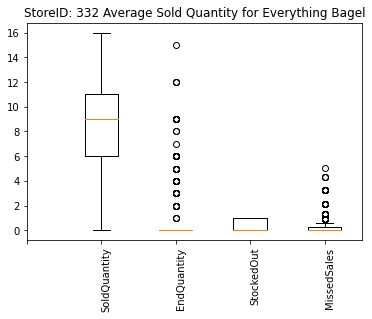

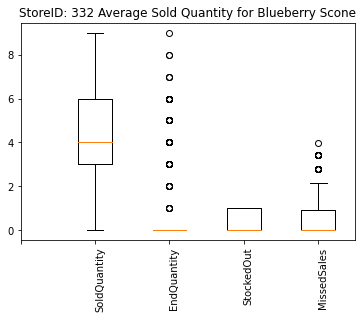

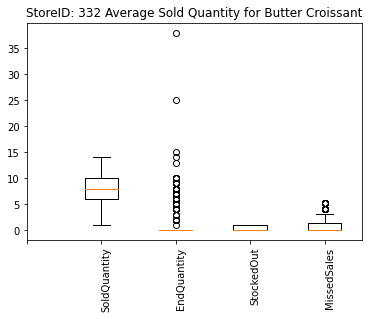

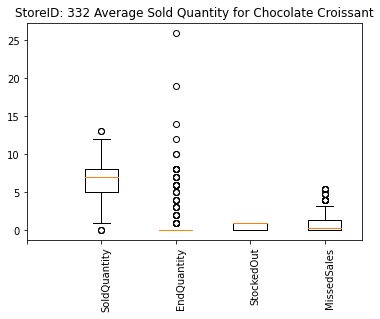

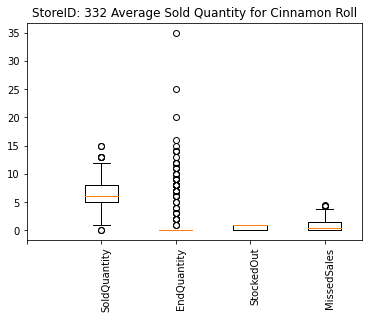

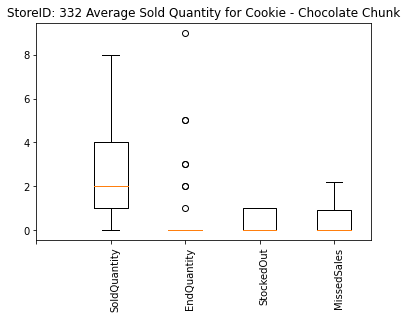

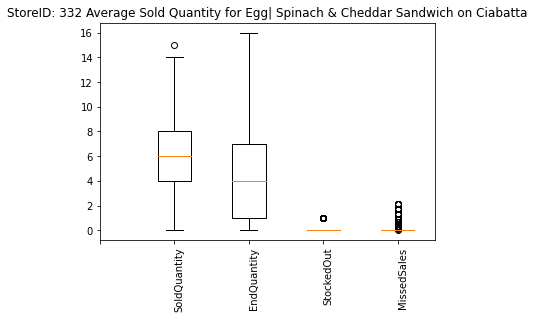

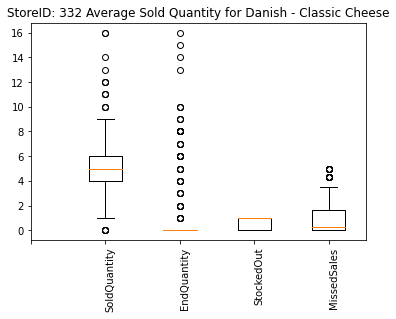

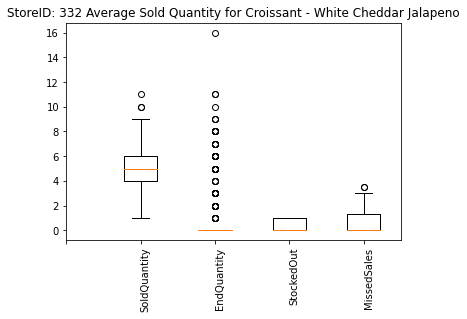

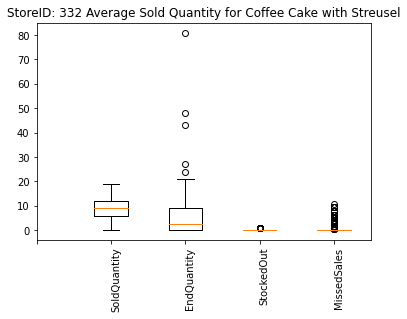

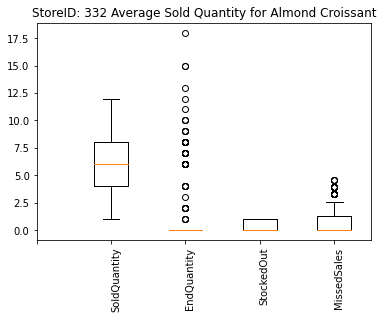

In [ ]:
item_statistics(store332)

#### Corporate

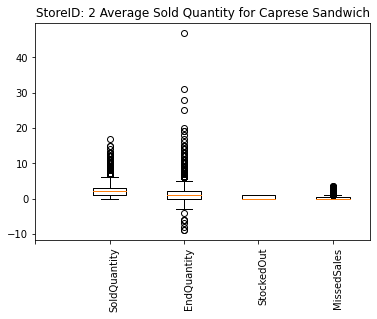

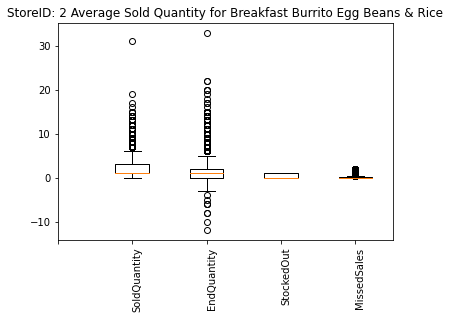

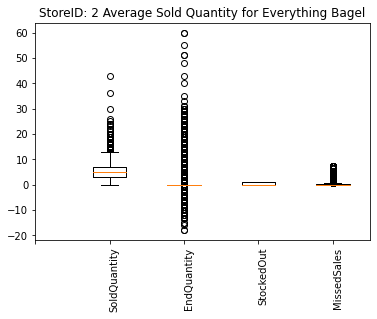

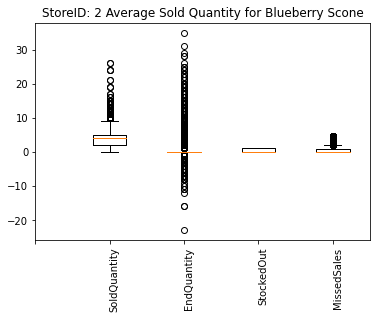

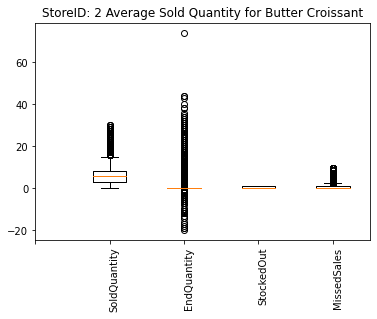

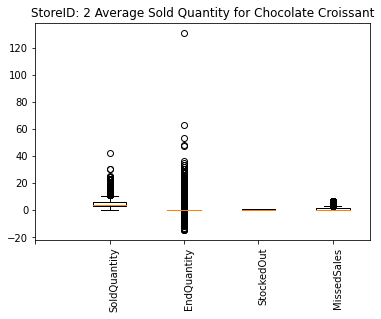

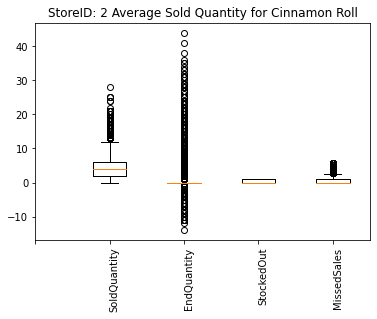

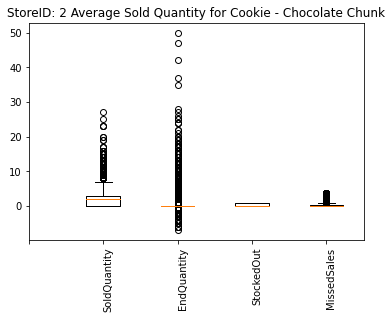

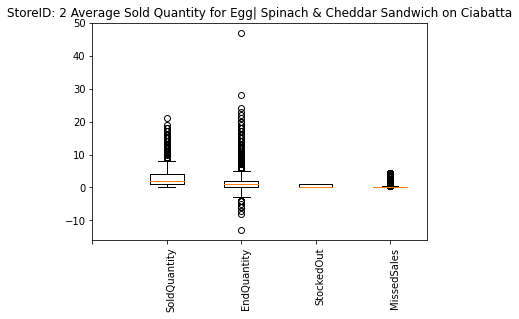

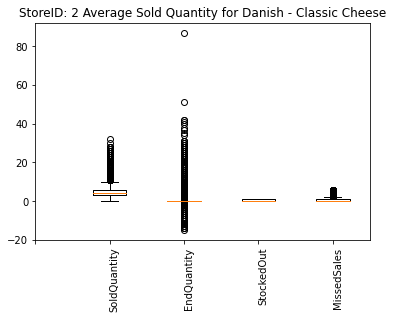

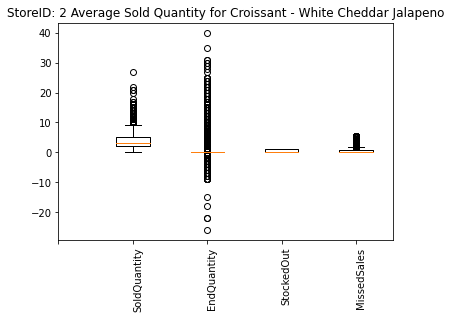

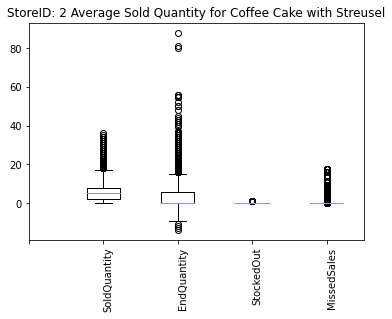

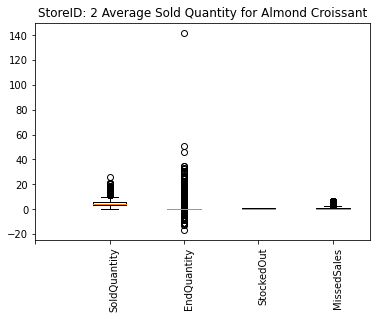

In [ ]:
item_statistics(new_corporate_data)

### Best / Worst Sellers

In [ ]:
def best_and_worst_seller(df):
    averageSold = []
    store_ID = df['StoreID'].unique()[0]
    namesMainData = df['Description'].unique()
    
    for name in namesMainData:
        averageSold.append([name, df.loc[df['Description'] == name]['SoldQuantity'].mean() * 3])
    for n in range(len(averageSold)-1, 0, -1):
        for i in range(n):
            if averageSold[i][1] < averageSold[i + 1][1]:
                averageSold[i], averageSold[i + 1] = averageSold[i + 1], averageSold[i]

    topTwentyFive = round((len(averageSold)/4))

    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    sales = []
    products = []
    plt.title(f"Top 25% Selling Items")
    plt.xlabel('Product')
    plt.ylabel('Avg Daily Sales $')
    for i in range(0, topTwentyFive):
        sales.append(averageSold[i][1])
        products.append(averageSold[i][0])

    ax.bar(products,sales)
    plt.xticks(fontsize='8')
    plt.show()

    print()

    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    sales = []
    products = []
    plt.title(f"Worst 25% Selling Items")
    plt.xlabel('Product')
    plt.ylabel('Avg Daily Sales $')
    for i in range(len(averageSold) - topTwentyFive, len(averageSold)):
        sales.append(averageSold[i][1])
        products.append(averageSold[i][0])

    ax.bar(products,sales)
    plt.xticks(fontsize='8')
    plt.show()



#### Store 18

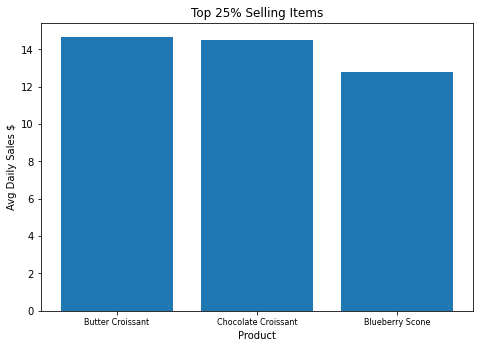

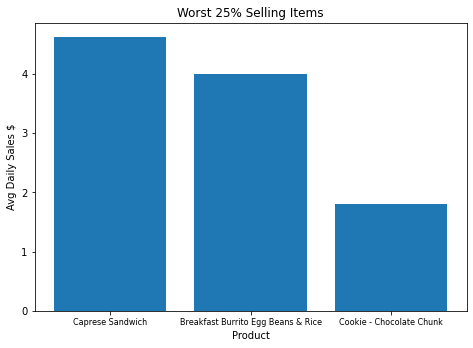

In [ ]:
best_and_worst_seller(store18)

#### Store 117

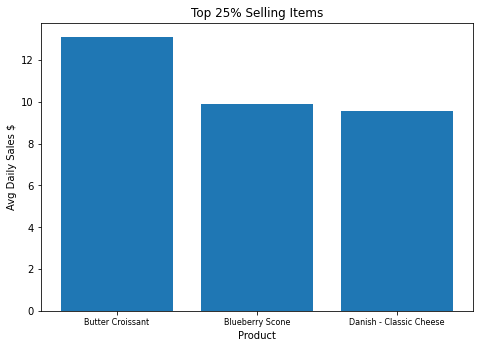

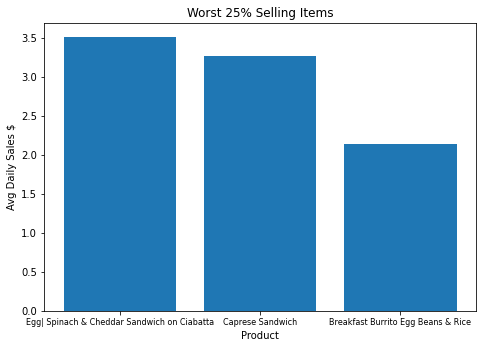

In [ ]:
best_and_worst_seller(store117)

#### Store 332

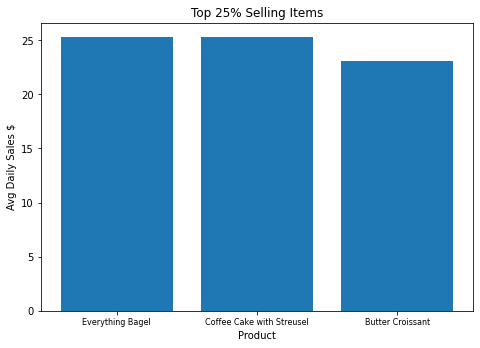

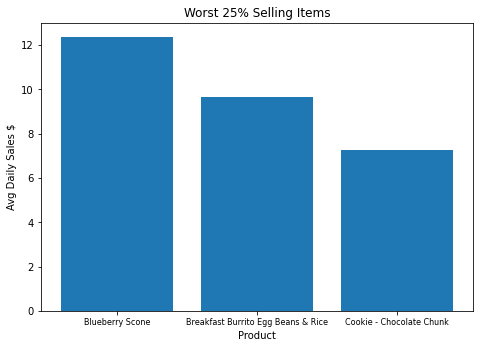

In [ ]:
best_and_worst_seller(store332)

#### Corporate

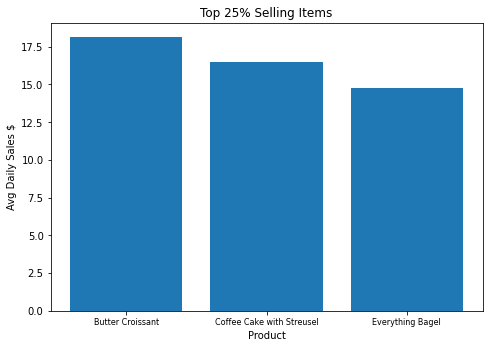

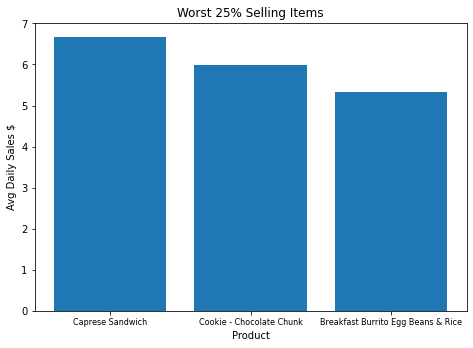

In [ ]:
best_and_worst_seller(new_corporate_data)

### Best and worst product based on inventory management

In [ ]:
def best_and_worst_inventory_management(df):

    store_ID = df['StoreID'].unique()[0]
    averageSold = []
    for name in df['Description'].unique():
        averageSold.append([name,  (df.loc[df['Description'] == name]['SoldQuantity'].mean() * 3 - df.loc[df['Description'] == name]['ReceivedQuantity'].mean() * .5)])


    for n in range(len(averageSold)-1, 0, -1):
        for i in range(n):
            if averageSold[i][1] < averageSold[i + 1][1]:
                averageSold[i], averageSold[i + 1] = averageSold[i + 1], averageSold[i]

    topTwentyFive = round((len(averageSold)/4))

    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    sales = []
    products = []
    plt.title(f"Top 25% Managed Items")
    plt.xlabel('Product')
    plt.ylabel('Avg Daily Profit After Unsold Loss')
    for i in range(0, topTwentyFive):
        sales.append(averageSold[i][1])
        products.append(averageSold[i][0])

    ax.bar(products,sales)
    plt.xticks(fontsize='9')
    plt.show()
    print()

    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    sales = []
    products = []
    plt.title(f"Worst 25% Managed Items")
    plt.xlabel('Product')
    plt.ylabel('Avg Daily Profit  After Unsold Loss')
    for i in range(len(averageSold) - topTwentyFive, len(averageSold)):
        sales.append(averageSold[i][1])
        products.append(averageSold[i][0])

    ax.bar(products,sales)
    plt.xticks(fontsize='8')
    plt.show()



####Store 18

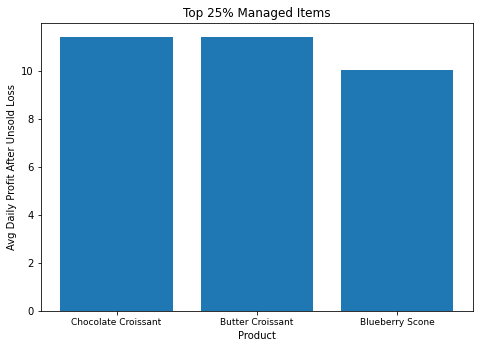

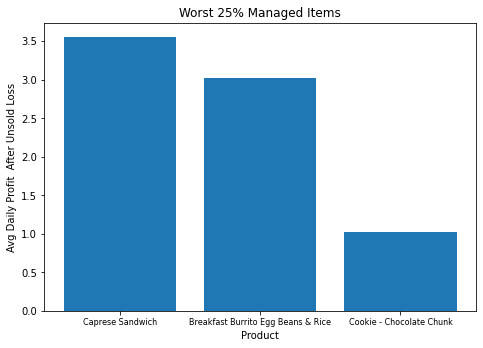

In [ ]:
best_and_worst_inventory_management(store18)

####Store 117

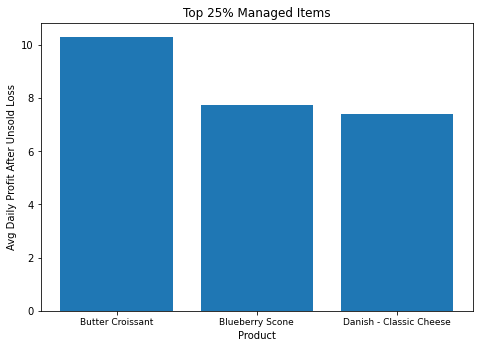

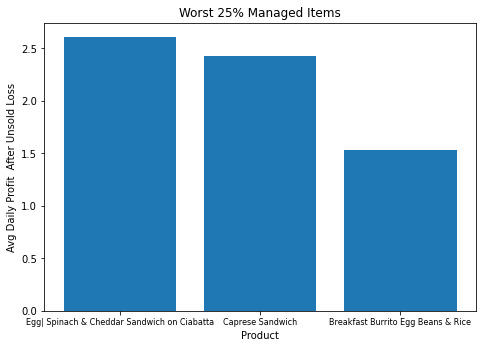

In [ ]:
best_and_worst_inventory_management(store117)

#### Store 332

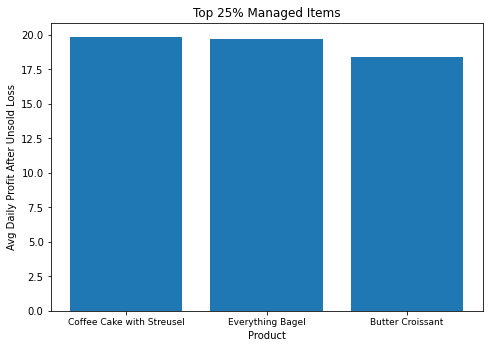

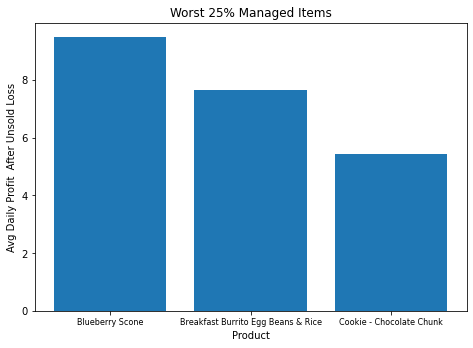

In [ ]:
best_and_worst_inventory_management(store332)

#### Corporate

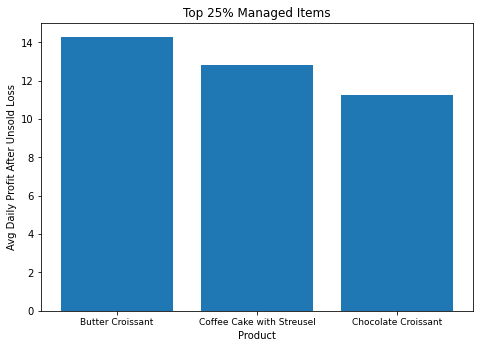

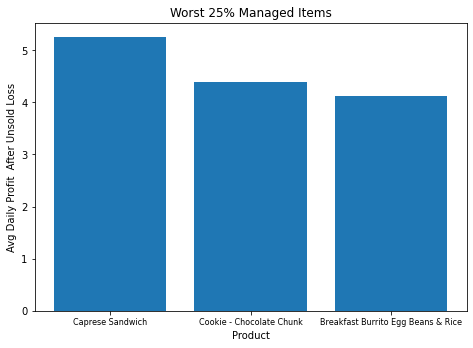

In [ ]:
best_and_worst_inventory_management(new_corporate_data)

### Identify stock outs and estimate the loss of sales per year per product

In [ ]:
def loss_sales_from_stock_out(df):
    all_products = df['Description'].unique()
    stockout_dict = dict()
    lost_sales_dict = dict()

    for product in all_products:
        stockout_dict[product] = df[(df['Description'] == product) & (df['StockedOut'] == 1)]

    product_sales_avg = dict()
    for product in all_products:
        product_sales_avg[product] = df[(df['Description'] == product)]['SoldQuantity'].mean()
    
    barrier_date =  '2019-06-29'.split('-')
    barrier_date = datetime(int(barrier_date[0]), int(barrier_date[1]), int(barrier_date[2]))

    for product in all_products:
        lost_sales_dict[product] = 0
        for outstock_day in stockout_dict[product]['BusinessDate']:
        # converting date to python date
            outstock_date =  outstock_day.split('-')
            outstock_date = datetime(int(outstock_date[0]), int(outstock_date[1]), int(outstock_date[2]))
            total = 0
            for i in range(4, 0, -1 ):
                date = outstock_date
                # currentDate = str(date)[:10]
                week_ago =  date - timedelta(days=(7*i))
                last_week_date = str(week_ago)[:10]
                if week_ago < barrier_date:
                # we are beyond the barrier therefore total will be whole item average
                    total = product_sales_avg[product] * 4
                    break
                week_ago_value = (df[(df['Description'] == product) & (df['BusinessDate'] == last_week_date)])['SoldQuantity'].values
                if len(week_ago_value) == 0:
                    total += 0
                else:
                    total += week_ago_value[0]
            lost_sales_dict[product] += (total / 4) * .75



    #print out the results
    for key, value in lost_sales_dict.items():
        print(f'{key}: {value:.2f}')



#### Store 18

In [ ]:
loss_sales_from_stock_out(store18)

Caprese Sandwich: 105.25
Breakfast Burrito Egg Beans & Rice: 80.62
Everything Bagel: 370.51
Blueberry Scone: 588.41
Butter Croissant: 599.17
Chocolate Croissant: 632.74
Cinnamon Roll: 463.49
Cookie - Chocolate Chunk: 44.04
Egg| Spinach & Cheddar Sandwich on Ciabatta: 197.62
Danish - Classic Cheese: 471.10
Croissant - White Cheddar Jalapeno: 296.08
Coffee Cake with Streusel: 62.06
Almond Croissant: 507.92


#### Store 117

In [ ]:
loss_sales_from_stock_out(store117)

Caprese Sandwich: 99.15
Breakfast Burrito Egg Beans & Rice: 51.26
Everything Bagel: 366.51
Blueberry Scone: 528.44
Butter Croissant: 602.45
Chocolate Croissant: 448.53
Cinnamon Roll: 507.84
Cookie - Chocolate Chunk: 178.51
Egg| Spinach & Cheddar Sandwich on Ciabatta: 74.51
Danish - Classic Cheese: 460.99
Croissant - White Cheddar Jalapeno: 259.48
Coffee Cake with Streusel: 92.90
Almond Croissant: 323.53


#### Store 332

In [ ]:
loss_sales_from_stock_out(store332)

Caprese Sandwich: 172.29
Breakfast Burrito Egg Beans & Rice: 235.84
Everything Bagel: 705.73
Blueberry Scone: 477.69
Butter Croissant: 926.65
Chocolate Croissant: 916.98
Cinnamon Roll: 922.50
Cookie - Chocolate Chunk: 297.92
Egg| Spinach & Cheddar Sandwich on Ciabatta: 353.38
Danish - Classic Cheese: 707.37
Croissant - White Cheddar Jalapeno: 645.20
Coffee Cake with Streusel: 330.28
Almond Croissant: 780.49


#### Corporate

In [ ]:
def loss_sales_from_stock_out_corporate(data_main):
    storeCount = len(data_main['StoreID'].unique())
    namesMainData = data_main['Description'].unique()
    for name in namesMainData:
      totalLoss = 0

      for date in data_main.loc[data_main['Description'] == name]['BusinessDate'].unique():
        sdate = datetime(int(date.split('-')[0]), int(date.split('-')[1]), int(date.split('-')[2])) 

        days = [sdate - timedelta(days=7),  sdate - timedelta(days=14), sdate - timedelta(days=21), sdate - timedelta(days=28)]
        totalSaleAmount = 0
        daysFound = 0
        for newDate in days:
            thisMonth = str(newDate.month)
            thisDay = str(newDate.day)

            if(len(thisMonth) == 1):
              thisMonth = "0" + str(newDate.month)
            if(len(thisDay) == 1):
              thisDay = "0" + str(newDate.day)
            currentDate = str(newDate.year) + "-" +  str(thisMonth) + "-" + str(thisDay)
            if(data_main[(data_main['Description'] == name) & (data_main['BusinessDate'] == currentDate)]['SoldQuantity'].empty == False):
              totalSaleAmount += data_main[(data_main['Description'] == name) & (data_main['BusinessDate'] == currentDate)]['SoldQuantity'].sum()
            else:
              totalSaleAmount += 3.89829718958646 * storeCount

        data_main.loc[(data_main['Description'] == name)  & (data_main['BusinessDate'] == date)]['SoldQuantity'].mean()
        
        
        totalLoss += round((((totalSaleAmount/4) * .75) * 3.0) * data_main.loc[(data_main['Description'] == name)  & (data_main['BusinessDate'] == date)]['StockedOut'].mean(), 2)

      print(f'{name}: {totalLoss}')




In [ ]:
loss_sales_from_stock_out_corporate(new_corporate_data)

Caprese Sandwich: 32573.85000000002
Breakfast Burrito Egg Beans & Rice: 22260.899999999976
Everything Bagel: 76175.53999999998
Blueberry Scone: 99063.72
Butter Croissant: 114751.40000000002
Chocolate Croissant: 116308.25000000004
Cinnamon Roll: 95331.97999999994
Cookie - Chocolate Chunk: 30882.03999999999
Egg| Spinach & Cheddar Sandwich on Ciabatta: 26645.42999999999
Danish - Classic Cheese: 98342.72999999991
Croissant - White Cheddar Jalapeno: 62862.25000000006
Coffee Cake with Streusel: 32759.110000000022
Almond Croissant: 93048.41999999998


### Impact of day of the week on sales and stocks

In [ ]:
from pandas.core.frame import DataFrame

def day_of_week_impact(df):

    store_ID = df['StoreID'].unique()[0]
    dailySalesStock = []
    namesMainData = df['Description'].unique()
    for name in namesMainData:
        dayStocks = [0,0,0,0,0,0,0]
        daySales = [0,0,0,0,0,0,0]
        for date in df.loc[df['Description'] == name]['BusinessDate'].unique():
            sdate = datetime(int(date.split('-')[0]), int(date.split('-')[1]), int(date.split('-')[2])) 
            dayStocks[sdate.weekday()] = (dayStocks[sdate.weekday()] + df[(df['Description'] == name) & (df['BusinessDate'] == date)]['SoldQuantity'].mean() + df[(df['Description'] == name) & (df['BusinessDate'] == date)]['EndQuantity'].mean())/2
            daySales[sdate.weekday()] = (daySales[sdate.weekday()] + df[(df['Description'] == name) & (df['BusinessDate'] == date)]['SoldQuantity'].mean())/2
        dailySalesStock.append([name, dayStocks, daySales])  

    """ for item in dailySalesStock:
        percent_list = []
        for i in range(len(item[1])):
            percentage = item[2][i]/item[1][i]
            percent_list.append(percentage)
    
        plt.plot(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],percent_list)
        plt.title(item[0])
        plt.show()
        ## working on making the percentage bars maybe we can see how to determine restocking patterns based 
        ## on the percentage of sold/stock value

        ## is end quantity accurate? some values have received quant equal to end quant even though there were sales. """
    for item in dailySalesStock:
    # print(item)
        data = [item[1], item[2]]
        X = np.arange(7)
        fig = plt.figure()

        ax = fig.add_axes([0,0,1,1])
        ax.bar(X + 0.00, data[0], color = 'b', width = 0.25)
        ax.bar(X + 0.25, data[1], color = 'g', width = 0.25)
        ax.legend(labels=['Stock', 'Sold'])
        plt.xticks(X, ('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'))

        plt.title(f"{item[0]} Specific Day Sales")
        plt.xlabel('Day')
        plt.ylabel('Item Amount')
        fig = plt.figure()
        print()




#### Store 18

In [ ]:
day_of_week_impact(store18)

#### Store 117

In [ ]:
day_of_week_impact(store117)

#### Store 332

In [ ]:
day_of_week_impact(store332)

#### Corporate

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


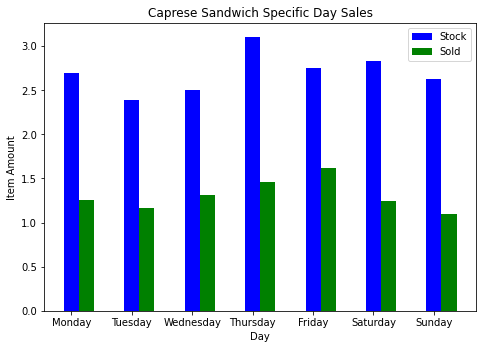

<Figure size 432x288 with 0 Axes>

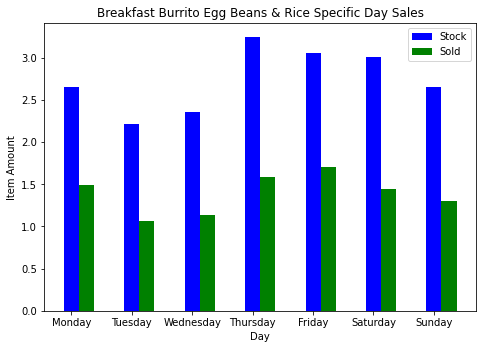

<Figure size 432x288 with 0 Axes>

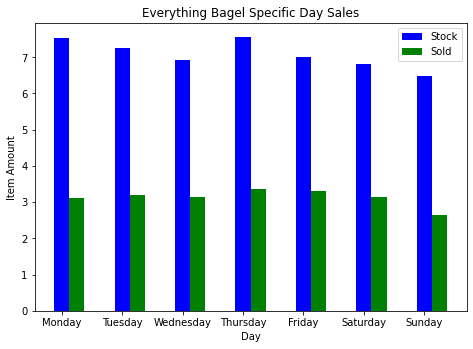

<Figure size 432x288 with 0 Axes>

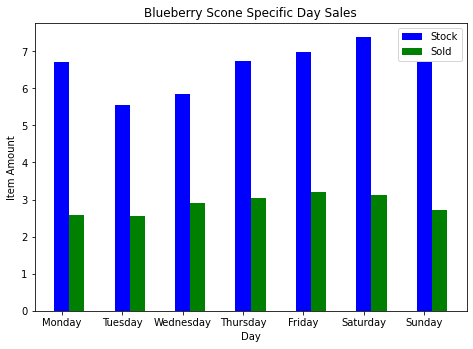

<Figure size 432x288 with 0 Axes>

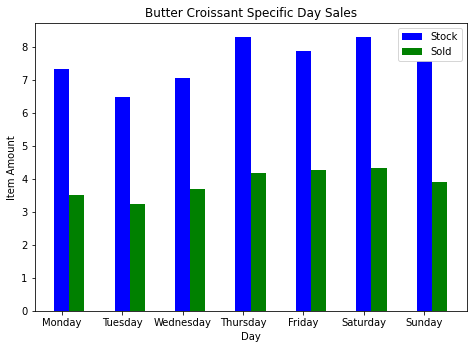

<Figure size 432x288 with 0 Axes>

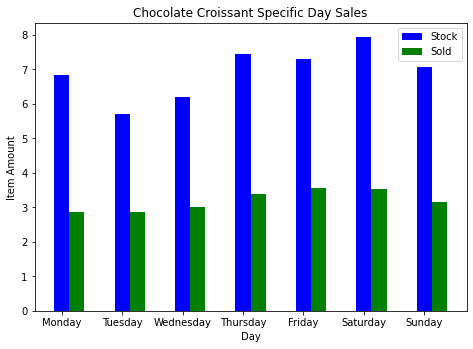

<Figure size 432x288 with 0 Axes>

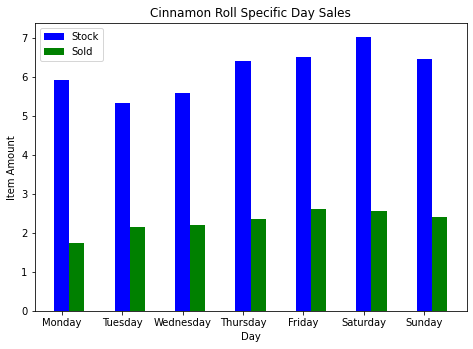

<Figure size 432x288 with 0 Axes>

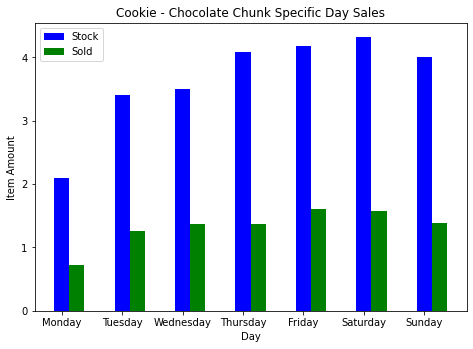

<Figure size 432x288 with 0 Axes>

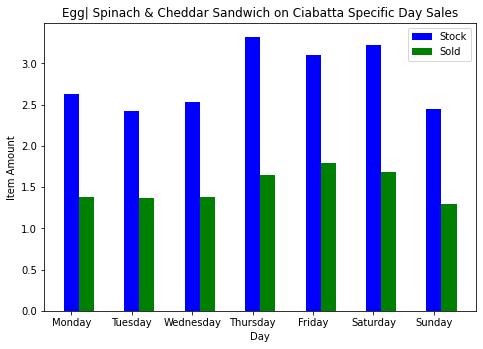

<Figure size 432x288 with 0 Axes>

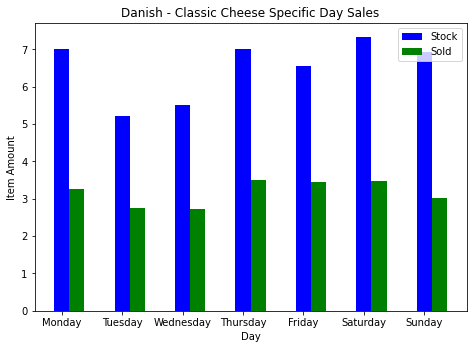

<Figure size 432x288 with 0 Axes>

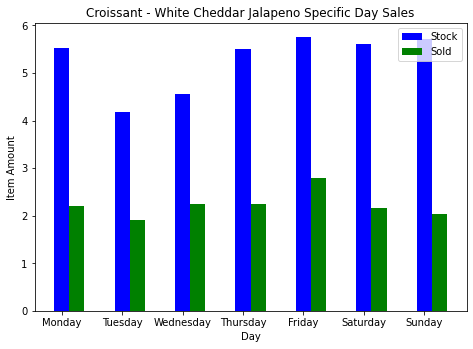

<Figure size 432x288 with 0 Axes>

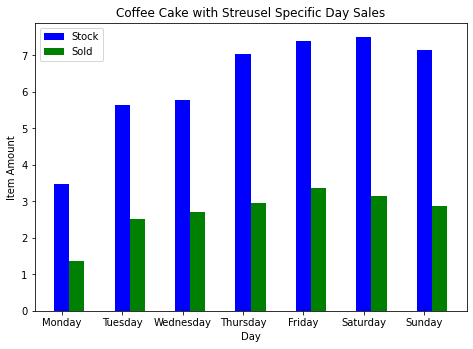

<Figure size 432x288 with 0 Axes>

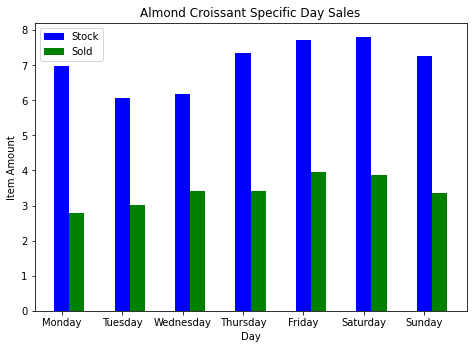

<Figure size 432x288 with 0 Axes>

In [ ]:
day_of_week_impact(new_corporate_data)

### Monthly changes


In [ ]:
def monthly_patterns(df):
    itemmonths = []

    for date in df['BusinessDate'].unique():
        year = date.split('-')[0]
        month =  date.split('-')[1]
    
        if([month, year] not in itemmonths):
            itemmonths.append([month, year])

    monthlyStockData = []
    for name in df['Description'].unique():
        monthlyData = []
        for month in itemmonths:
            thisMonthSales = 0
            thisMonthStocks = 0
            sdate = datetime(int(month[1]), int(month[0]), 1) 
            edate = sdate + relativedelta(months=1)
            delta = edate - sdate   # returns timedelta
            for i in range(delta.days + 1):
                day = sdate + timedelta(days=i)
                thisMonth = str(day.month)
                thisDay = str(day.day)
                dayStocks = [0,0,0,0,0,0,0]
                daySales = [0,0,0,0,0,0,0]

                if(len(thisMonth) == 1):
                    thisMonth = "0" + str(day.month)
                
                if(len(thisDay) == 1):
                    thisDay = "0" + str(day.day)

                currentDate = str(day.year) + "-" +  str(thisMonth) + "-" + str(thisDay)
                if(df[(df['Description'] == name) & (df['BusinessDate'] == currentDate)]['SoldQuantity'].empty == False):
                    thisMonthStocks += (dayStocks[sdate.weekday()] + df[(df['Description'] == name) & (df['BusinessDate'] == currentDate)]['SoldQuantity'].mean() + df[(df['Description'] == name) & (df['BusinessDate'] == currentDate)]['EndQuantity'].mean())/2
                    thisMonthSales += (daySales[sdate.weekday()] + df[(df['Description'] == name) & (df['BusinessDate'] == currentDate)]['SoldQuantity'].mean())/2
            monthlyData.append([month, thisMonthStocks, thisMonthSales])
        monthlyStockData.append([name, monthlyData])

    for item in monthlyStockData:
        datas1 = []
        datas2 = []
        for i in item[1]:
            datas1.append(i[1])
            datas2.append(i[2])
        data = [datas1, datas2]
        X = np.arange(len(datas2))
        fig = plt.figure()

        ax = fig.add_axes([0,0,1,1])
        ax.bar(X + 0.00, data[0], color = 'b', width = 0.25)
        ax.bar(X + 0.25, data[1], color = 'g', width = 0.25)
        ax.legend(labels=['Stock', 'Sold'])
        axisTicks = ()
        for i in item[1]:
            titleDate = i[0][0] + "/" + i[0][1]
            axisTicks = axisTicks + (titleDate,)

        plt.xticks(X, (axisTicks))

        plt.title(item[0] +" Specific Month Sales")
        plt.xlabel('Month')
        plt.ylabel('Item Amount')
        plt.xticks(fontsize='10' , rotation=90)

        fig = plt.figure()
        print()


#### Store 18

In [ ]:
monthly_patterns(store18)

#### Store 117

In [ ]:
monthly_patterns(store117)

#### Store 332

In [ ]:
monthly_patterns(store332)

####Corporate

In [ ]:
monthly_patterns(new_corporate_data)

### Weather

In [ ]:
def weather_pattern_sales(df):
  tempuratureEffects = []
  namesMainData = df['Description'].unique()
  for name in namesMainData:
    itemDates = df[df['Description']==name]['BusinessDate'].unique()
    avgTemps = []
    stocks = []
    sales = []
    for date in itemDates:
      temperature = round(df[df['BusinessDate'] == date]['temp'].mean(),0)
      if (temperature in avgTemps):
        sales[avgTemps.index(temperature)] = (sales[avgTemps.index(temperature)] + df[(df['Description'] == name) & (df['BusinessDate'] == date)]['SoldQuantity'].mean())/2
        stocks[avgTemps.index(temperature)] = (stocks[avgTemps.index(temperature)] + df[(df['Description'] == name) & (df['BusinessDate'] == date)]['SoldQuantity'].mean() + df[(df['Description'] == name) & (df['BusinessDate'] == date)]['EndQuantity'].mean())/2 
      else:
        avgTemps.append(temperature)
        sales.append(df[(df['Description'] == name) & (df['BusinessDate'] == date)]['SoldQuantity'].mean())
        stocks.append(df[(df['Description'] == name) & (df['BusinessDate'] == date)]['SoldQuantity'].mean() + df[(df['Description'] == name) & (df['BusinessDate'] == date)]['EndQuantity'].mean())

    tempuratureEffects.append([name, avgTemps, sales, stocks])
    
  for j in tempuratureEffects:
    for n in range(len(j[1])-1, 0, -1):
      for i in range(n):
        if j[1][i] < j[1][i+1]:
            j[1][i], j[1][i + 1] = j[1][i + 1], j[1][i]
            j[2][i], j[2][i + 1] = j[2][i + 1], j[2][i]
            j[3][i], j[3][i + 1] = j[3][i + 1], j[3][i]

  for item in tempuratureEffects:
    data = [item[2], item[3]]
    X = np.arange(len(item[1]))
    fig = plt.figure(figsize=(10, 3))

    ax = fig.add_axes([0,0,1,1])
    ax.bar(X + 0.00, data[0], color = 'b', width = 0.25)
    ax.bar(X + 0.25, data[1], color = 'g', width = 0.25)
    ax.legend(labels=['Sold', 'Stock'])
    axisTicks = ()
    for i in item[1]:
      titleDate = i
      axisTicks = axisTicks + (titleDate,)

    plt.xticks(X, (axisTicks))
    plt.title(item[0] +"Temperature Sales and Stock")
    plt.xlabel('Temperature F')
    plt.ylabel('Item Amount')
    plt.xticks(fontsize='10' , rotation=90)

    fig = plt.figure()







In [ ]:
def weathercondition_pattern_sales(df):
  
  namesMainData = df['Description'].unique()
  for name in namesMainData:
    
    stocks = list()
    sales = list()
    conditions = df['conditions'].unique()
    for condition in conditions:
        sales.append(df[(df['Description'] == name) & (df['conditions'] == condition)]['SoldQuantity'].mean())
        stocks.append(df[(df['Description'] == name) & (df['conditions'] == condition)]['SoldQuantity'].mean() + df[(df['Description'] == name)]['EndQuantity'].mean())

    sales.append(df[(df['Description'] == name)]['SoldQuantity'].mean())
    stocks.append(df[(df['Description'] == name)]['SoldQuantity'].mean() + df[(df['Description'] == name)]['EndQuantity'].mean())
    conditions = np.append(conditions, 'Yearly Average')
    fig = plt.figure(figsize=(10, 3))
    X_axis = np.arange(len(conditions))
    
    

    ax = fig.add_axes([0,0,1,1])
    ax.bar(X_axis - 0.2, sales, color = 'b', width = 0.25)
    ax.bar(X_axis + 0.2, stocks, color = 'g', width = 0.25)
    plt.xticks(X_axis, conditions)
    ax.legend(labels=['Sold', 'Stock'])
    plt.title(name +" Weather Condition Sales and Stock")
    plt.ylabel('Item Amount')
    plt.xticks(fontsize='10')

    fig = plt.figure()

#### Store 18

In [ ]:
weather_pattern_sales(store18)

In [ ]:
weathercondition_pattern_sales(store18)

#### Store 117

In [ ]:
weather_pattern_sales(store117)

In [ ]:
weathercondition_pattern_sales(store117)

#### Store 332

In [ ]:
weather_pattern_sales(store332)

NameError: ignored

In [ ]:
weathercondition_pattern_sales(store332)

#### Corporate

In [ ]:
def weather_pattern_sales_corporate(df):
  tempuratureEffects = []
  namesMainData = df['Description'].unique()
  for name in namesMainData:
    itemDates = df[df['Description']==name]['BusinessDate'].unique()
    avgTemps = []
    stocks = []
    sales = []
    for date in itemDates:
      temperature = round(df[df['BusinessDate'] == date]['national_maxtemp_avg'].mean(),0)
      if (temperature in avgTemps):
        sales[avgTemps.index(temperature)] = (sales[avgTemps.index(temperature)] + df[(df['Description'] == name) & (df['BusinessDate'] == date)]['SoldQuantity'].mean())/2
        stocks[avgTemps.index(temperature)] = (stocks[avgTemps.index(temperature)] + df[(df['Description'] == name) & (df['BusinessDate'] == date)]['SoldQuantity'].mean() + df[(df['Description'] == name) & (df['BusinessDate'] == date)]['EndQuantity'].mean())/2 
      else:
        avgTemps.append(temperature)
        sales.append(df[(df['Description'] == name) & (df['BusinessDate'] == date)]['SoldQuantity'].mean())
        stocks.append(df[(df['Description'] == name) & (df['BusinessDate'] == date)]['SoldQuantity'].mean() + df[(df['Description'] == name) & (df['BusinessDate'] == date)]['EndQuantity'].mean())

    tempuratureEffects.append([name, avgTemps, sales, stocks])
    
  for j in tempuratureEffects:
    for n in range(len(j[1])-1, 0, -1):
      for i in range(n):
        if j[1][i] < j[1][i+1]:
            j[1][i], j[1][i + 1] = j[1][i + 1], j[1][i]
            j[2][i], j[2][i + 1] = j[2][i + 1], j[2][i]
            j[3][i], j[3][i + 1] = j[3][i + 1], j[3][i]

  for item in tempuratureEffects:
    data = [item[2], item[3]]
    X = np.arange(len(item[1]))
    fig = plt.figure(figsize=(10, 3))

    ax = fig.add_axes([0,0,1,1])
    ax.bar(X + 0.00, data[0], color = 'b', width = 0.25)
    ax.bar(X + 0.25, data[1], color = 'g', width = 0.25)
    ax.legend(labels=['Sold', 'Stock'])
    axisTicks = ()
    for i in item[1]:
      titleDate = i
      axisTicks = axisTicks + (titleDate,)

    plt.xticks(X, (axisTicks))
    plt.title(item[0] +"Temperature Sales and Stock")
    plt.xlabel('Temperature F')
    plt.ylabel('Item Amount')
    plt.xticks(fontsize='10' , rotation=90)

    fig = plt.figure()







/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:49: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


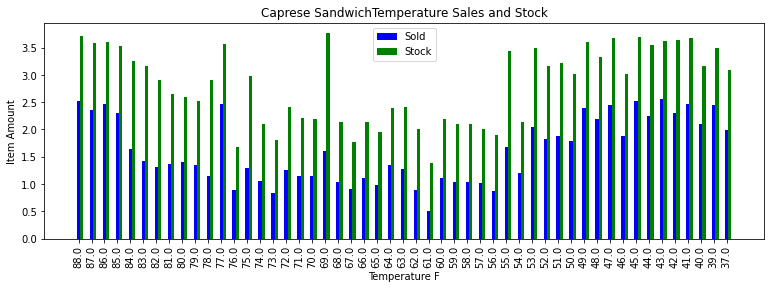

<Figure size 432x288 with 0 Axes>

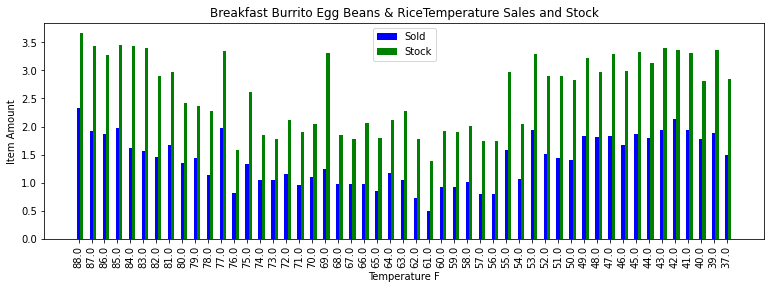

<Figure size 432x288 with 0 Axes>

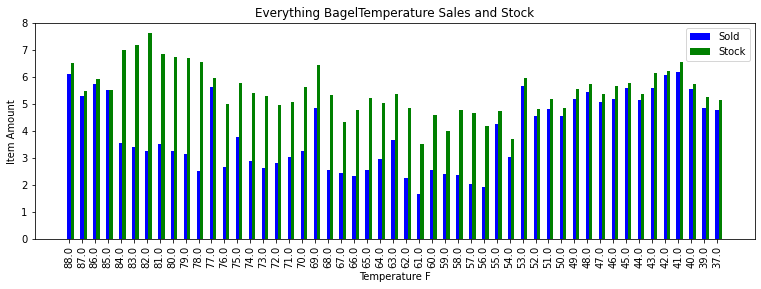

<Figure size 432x288 with 0 Axes>

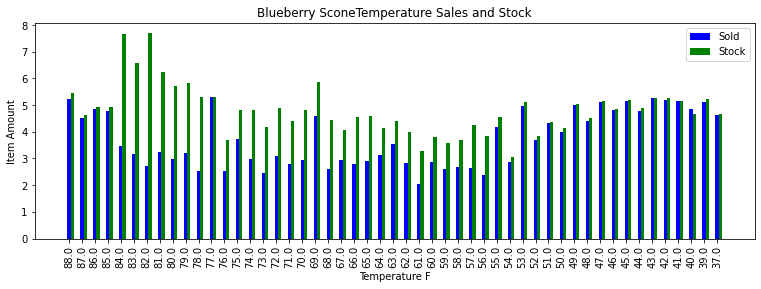

<Figure size 432x288 with 0 Axes>

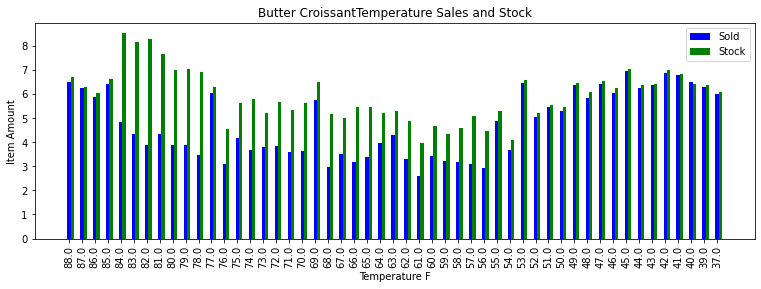

<Figure size 432x288 with 0 Axes>

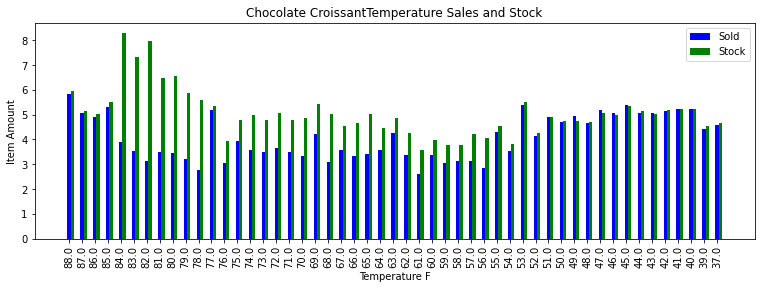

<Figure size 432x288 with 0 Axes>

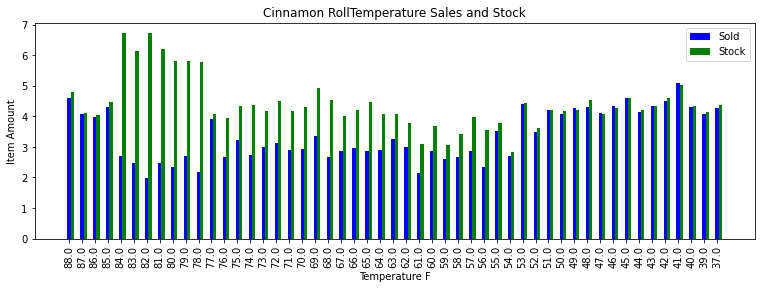

<Figure size 432x288 with 0 Axes>

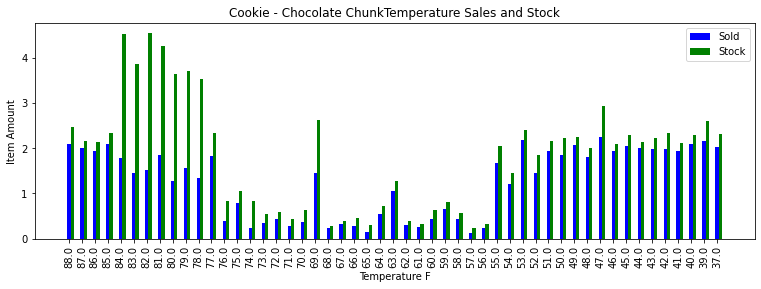

<Figure size 432x288 with 0 Axes>

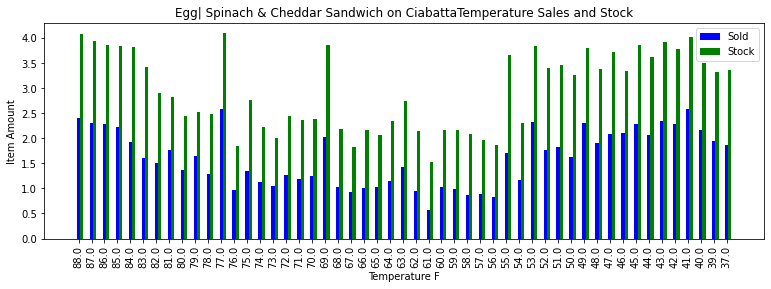

<Figure size 432x288 with 0 Axes>

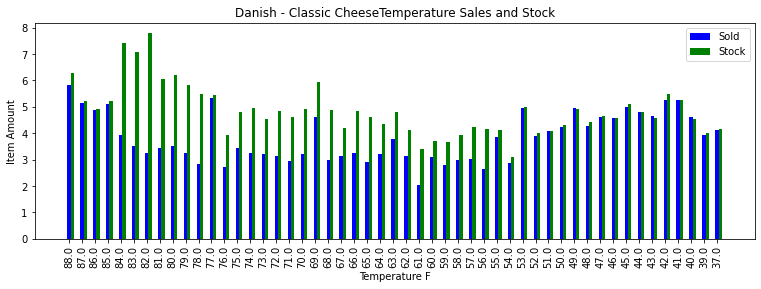

<Figure size 432x288 with 0 Axes>

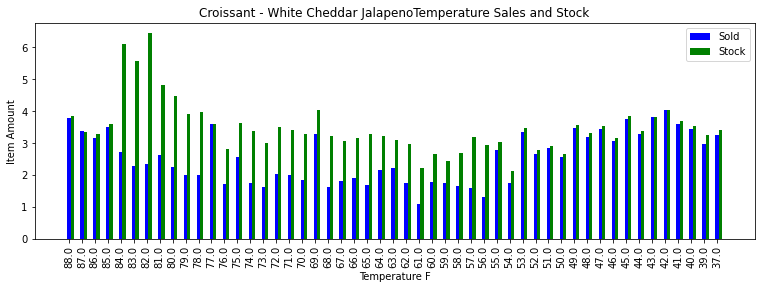

<Figure size 432x288 with 0 Axes>

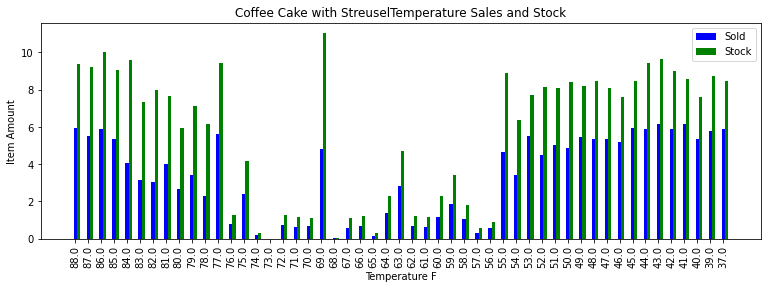

<Figure size 432x288 with 0 Axes>

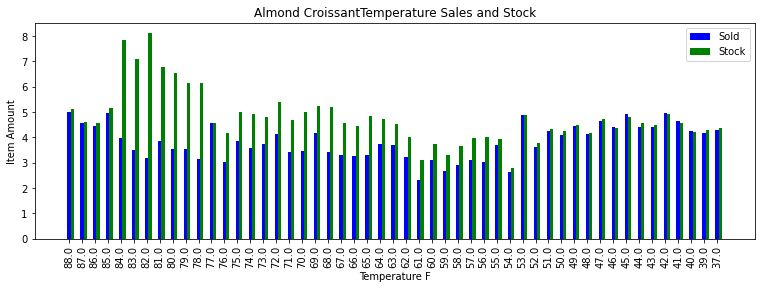

<Figure size 432x288 with 0 Axes>

In [ ]:
weather_pattern_sales_corporate(new_corporate_data)

### Drive Thru Features

In [ ]:
# Add an extra feature to the the data frame
drive_thru = [row == 332 for row in local_df['StoreID']]
local_df['DriveThru'] = drive_thru
# iterate through the 
for product in local_df['Description'].unique():
  # get average sales from product based on whether there was a drive tru or not
  drive_thru_sales = local_df[(local_df['DriveThru'] == True) & (local_df['Description'] == product)]['SoldQuantity'].mean()
  no_drive_thru_sales = local_df[(local_df['DriveThru'] == False) & (local_df['Description'] == product)]['SoldQuantity'].mean()
  # make bar plot
  fig = plt.figure()
  ax = fig.add_axes( [0,0,1,1])
  labels = ['No Drive Thru',  'Drive Thru']
  ax.bar(labels, [no_drive_thru_sales, drive_thru_sales])
  ax.set_title(f'{product} Average Sold Quantity')
  plt.show()
  print('\n\n\n')



### Impact of Holidays and weekends/weekdays

In [ ]:
def special_day_impact(df):
    cal = USFederalHolidayCalendar()
    holidays = cal.holidays(start='2018-01-01', end='2022-12-31').to_pydatetime()

    specialDayFeatures = []

    for name in df['Description'].unique():
        regularTotal = 0
        nonHolidayWeekendDailySales = 0
        holidayTotal = 0
        holidaySales = 0
        weekendTotal = 0
        weekendSales = 0
        for date in df.loc[df['Description'] == name]['BusinessDate'].unique():
            sdate = datetime(int(date.split('-')[0]), int(date.split('-')[1]), int(date.split('-')[2])) 
            thisMonth = str(sdate.month)
            thisDay = str(sdate.day)

            if(sdate.weekday() == 5 or sdate.weekday() == 6):
                weekendTotal += 1
                weekendSales += df[(df['Description'] == name) & (df['BusinessDate'] == date)]['SoldQuantity'].sum()
            elif(sdate in holidays):
                holidayTotal += 1
                holidaySales += df[(df['Description'] == name) & (df['BusinessDate'] == date)]['SoldQuantity'].sum()
            else:
                regularTotal += 1
                nonHolidayWeekendDailySales += df[(df['Description'] == name) & (df['BusinessDate'] == date)]['SoldQuantity'].sum()

        specialDayFeatures.append([name, nonHolidayWeekendDailySales/regularTotal, weekendSales/weekendTotal, holidaySales/holidayTotal])

    for item in specialDayFeatures:

        fig = plt.figure()
        ax = fig.add_axes([0,0,1,1])
        sales = []
        products = ["Weekday Non-Holiday", "Weekend", "Holiday"]
        plt.title(item[0] +" Specific Day Sales")
        plt.xlabel('Days')
        plt.ylabel('Sales')
        sales.append(item[1])
        sales.append(item[2])
        sales.append(item[3])

        ax.bar(products,sales)
        plt.xticks(fontsize='10' , rotation=90)
        plt.show()    
        print()

#### Store 18

In [ ]:
special_day_impact(store18)

#### Store 117

In [ ]:
special_day_impact(store117)

#### Store 332

In [ ]:
special_day_impact(store332)

#### Corporate

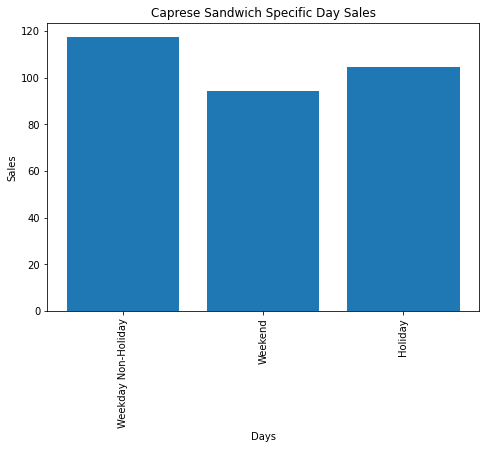

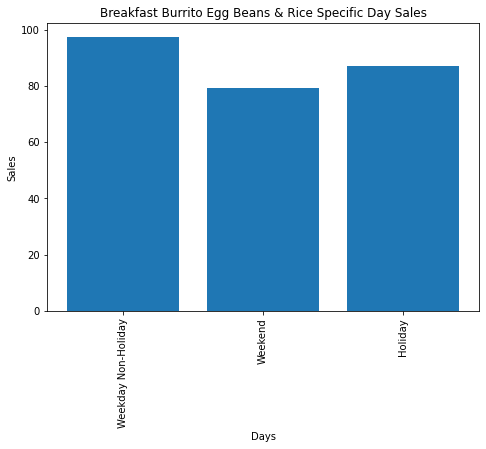

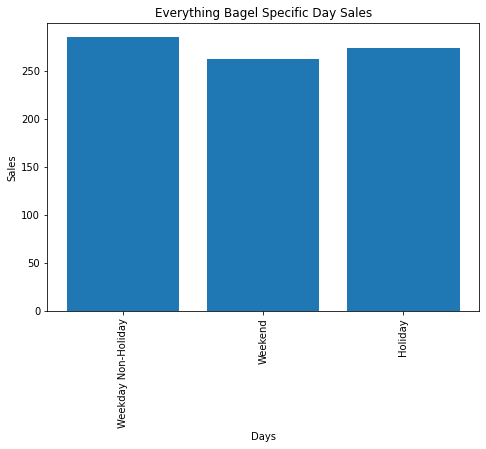

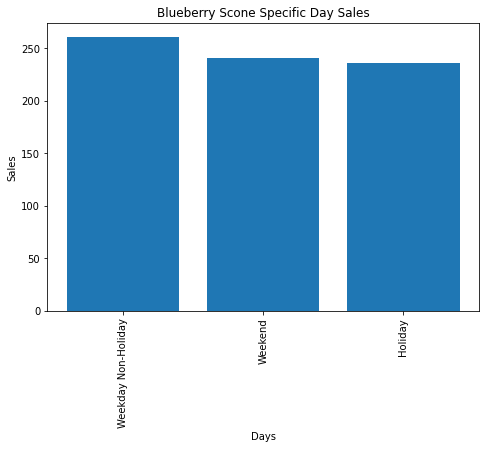

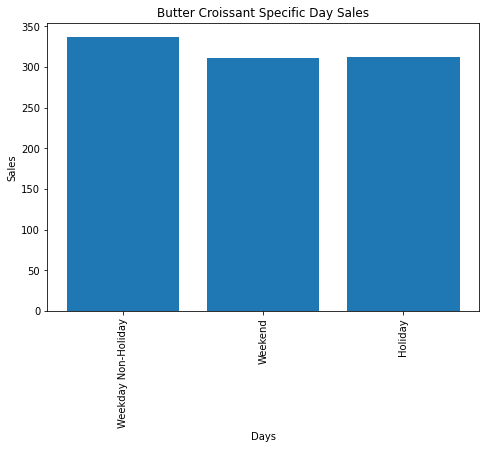

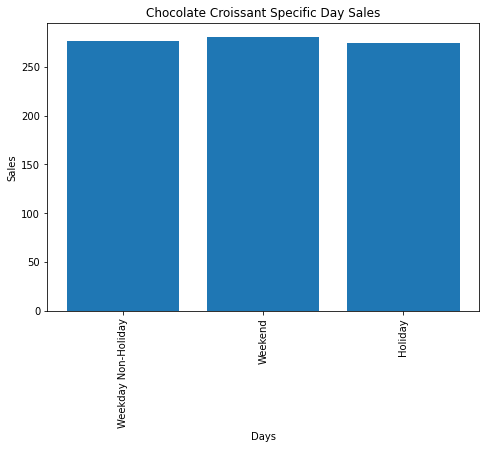

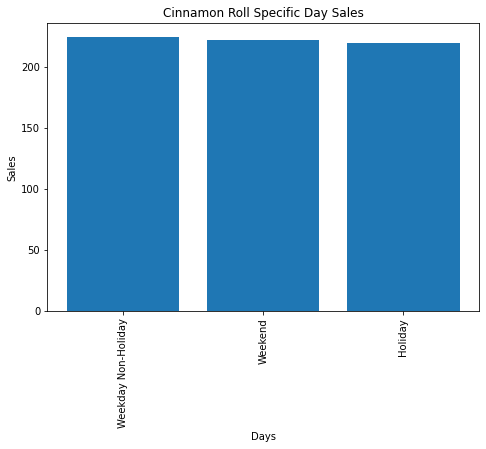

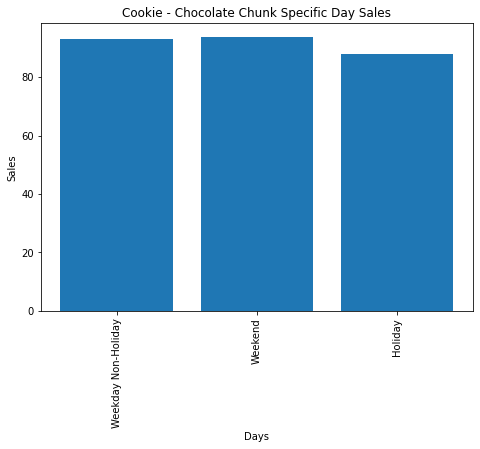

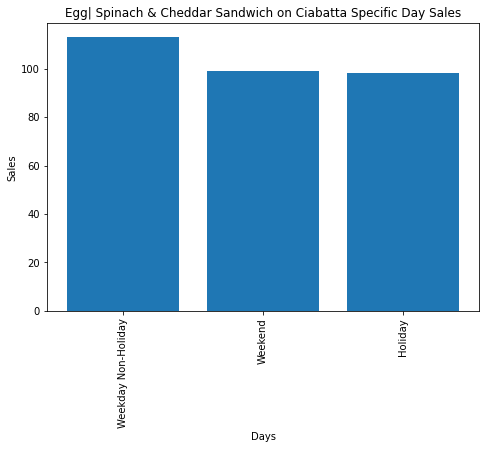

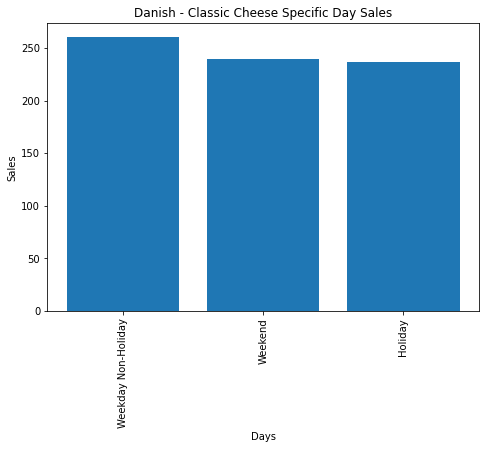

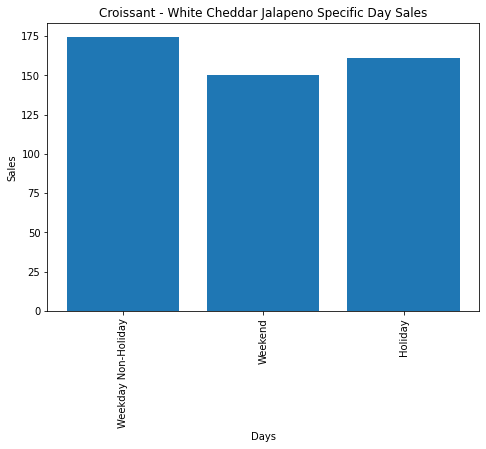

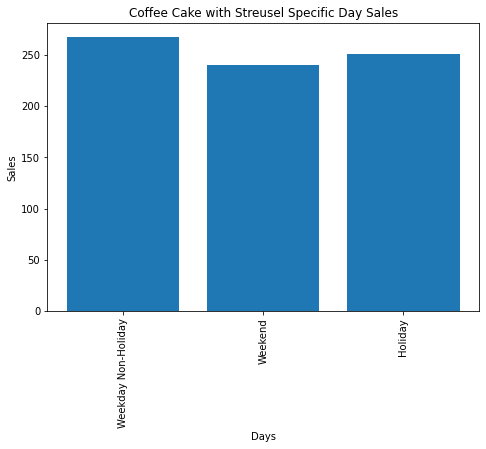

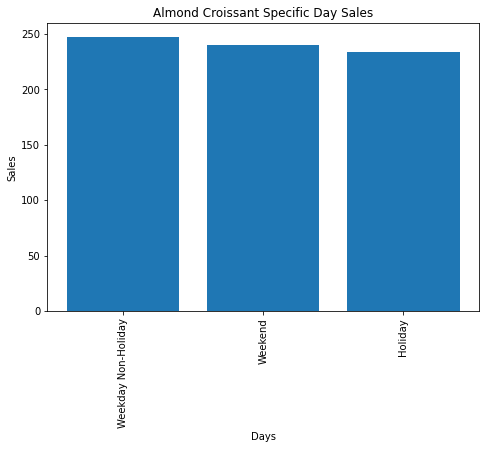

In [ ]:
special_day_impact(new_corporate_data)

### Stocking Patterns

In [ ]:
# might be better to display this as a line graph of restocking items,
# sold items and missed sales over the course of the year


def stocking_patterns_frequency(df):

    store_ID = df['StoreID'].unique()[0]
    frequency = list()
    for product in df['Description'].unique():
        restock_streak_amounts = list()
        product_data =  df[df['Description'] == product]['LatestOrder']
        i = 0
        for data in product_data:
            if data == 0 :
                i += 1
            else:
                restock_streak_amounts.append(i)
                i = 0
        
        restock_streak_count = dict()
        for i in restock_streak_amounts:
            if i in restock_streak_count:
                restock_streak_count[i] += 1
            else:
                restock_streak_count[i] = 1
        restock_streak_count = dict(sorted(restock_streak_count.items()))
        frequency.append([product, restock_streak_count])
    print(f'{store_ID} Stocking Pattern' )
    for i in frequency:
        print("item: ",  i[0])
        print()
        print("Restocking Streak, Frequency")
        for key, value in i[1].items():
            print(key, "\t\t  ", value)
        print("\n")

#### Store 18

In [ ]:
stocking_patterns_frequency(store18)

#### Store 117

In [ ]:
stocking_patterns_frequency(store117)

#### Store 332

In [ ]:
stocking_patterns_frequency(store332 )

####Corporate

In [ ]:
stocking_patterns_frequency(new_corporate_data)

2 Stocking Pattern
item:  Caprese Sandwich

Restocking Streak, Frequency
0 		   13766
1 		   2205
2 		   553
3 		   203
4 		   77
5 		   41
6 		   18
7 		   12
8 		   7
9 		   5
10 		   2
11 		   3
12 		   6
13 		   1
14 		   1
15 		   1
21 		   2


item:  Breakfast Burrito Egg Beans & Rice

Restocking Streak, Frequency
0 		   12293
1 		   2524
2 		   737
3 		   224
4 		   81
5 		   44
6 		   21
7 		   17
8 		   13
9 		   5
10 		   6
11 		   4
12 		   2
15 		   1
16 		   2
19 		   1
42 		   1


item:  Everything Bagel

Restocking Streak, Frequency
0 		   19238
1 		   828
2 		   161
3 		   43
4 		   19
5 		   8
6 		   4
8 		   2
9 		   1
10 		   2
12 		   1
13 		   1
17 		   1
37 		   1
366 		   1
367 		   1


item:  Blueberry Scone

Restocking Streak, Frequency
0 		   19666
1 		   738
2 		   133
3 		   35
4 		   13
5 		   3
6 		   3
8 		   1
9 		   1
10 		   2
12 		   1
15 		   1
367 		   2


item:  Butter Croissant

Restocking Streak, Frequency
0 		   20193
1 		   571
2 		   109
3 		 

#Chapter 2: Prediction

## Producing Synthetic Data

In [ ]:
CMD = "wget https://raw.githubusercontent.com/Diyago/"\
  "GAN-for-tabular-data/master/requirements.txt"
!{CMD}
%pip install -r requirements.txt
%pip install tabgan

--2022-04-18 03:22:03--  https://raw.githubusercontent.com/Diyago/GAN-for-tabular-data/master/requirements.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 197 [text/plain]
Saving to: ‘requirements.txt.2’

requirements.txt.2  100%[===================>]     197  --.-KB/s    in 0s      

2022-04-18 03:22:03 (7.82 MB/s) - ‘requirements.txt.2’ saved [197/197]



#### Loading Data for the local stores
We wish to generate data using tabgan.  To do so we must first load the csv of the local stores and will prep the data for generation.  To do so want to drop the columns that we will not be using for our models. At the current time of writing this we will not be including:

* Date - currently not needed will be subject to change if we wish to take in account the month has on a products sales
* Description - transformed to represent a numerical class
* CatergoryLvl2Desc
* CatergoryLvl3Desc
* description - weather is already described with conditions

In [ ]:
import pandas as pd

local_df = pd.read_csv('/content/drive/MyDrive/sprint2_local.csv')
local_df['Weekday'] = local_df['Weekday'].astype(bool)
local_df['Holiday'] = local_df['Holiday'].astype(bool)
local_df.shape

(9408, 18)

In [ ]:
# loading individual data values 
all_items = local_df['Description'].unique()
item_dfs = {}
for item in all_items:
    item_dfs[item] = local_df[local_df['Description'] == item].copy()
    item_dfs[item].drop(['StoreID', 'BusinessDate', 'Description', 'CategoryLvl2Desc', 'CategoryLvl3Desc'], axis=1, inplace=True)
    print(item, item_dfs[item].shape)

Caprese Sandwich (734, 13)
Breakfast Burrito Egg Beans & Rice (734, 13)
Everything Bagel (734, 13)
Blueberry Scone (734, 13)
Butter Croissant (734, 13)
Chocolate Croissant (734, 13)
Cinnamon Roll (734, 13)
Cookie - Chocolate Chunk (654, 13)
Egg| Spinach & Cheddar Sandwich on Ciabatta (734, 13)
Danish - Classic Cheese (734, 13)
Croissant - White Cheddar Jalapeno (734, 13)
Coffee Cake with Streusel (680, 13)
Almond Croissant (734, 13)


In [ ]:
from sklearn.model_selection import train_test_split

# split the data for Caprese Sandwich
df_x_train, df_x_test, df_y_train, df_y_test = train_test_split(
    item_dfs[all_items[0]].drop("SoldQuantity", axis=1),
    item_dfs[all_items[0]]["SoldQuantity"],
    test_size=0.20,
    #shuffle=False,
    random_state=42,
)

# Create dataframe versions for tabular GAN
df_x_test, df_y_test = df_x_test.reset_index(drop=True), \
  df_y_test.reset_index(drop=True)
df_y_train = pd.DataFrame(df_y_train)
df_y_test = pd.DataFrame(df_y_test)

# Pandas to Numpy
x_train = df_x_train.values
x_test = df_x_test.values
y_train = df_y_train.values
y_test = df_y_test.values

x_train[:, 6] = x_train[:, 6].astype(bool)
x_train[:, 6].dtype


dtype('O')

In [ ]:
from tabgan.sampler import GANGenerator
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

def synthetic_data(df_x_train, df_y_train, df_x_test):

    gen_x, gen_y = GANGenerator(gen_x_times=1.1, cat_cols=None,
            bot_filter_quantile=0.001, top_filter_quantile=0.999, \
                is_post_process=True,
            adversarial_model_params={
                "metrics": "rmse", "max_depth": 2, "max_bin": 100, 
                "learning_rate": 0.02, "random_state": \
                    42, "n_estimators": 500,
            }, pregeneration_frac=2, only_generated_data=False,\
            gan_params = {"batch_size": 500, "patience": 25, \
            "epochs" : 500,}).generate_data_pipe(df_x_train, df_y_train,\
            df_x_test, deep_copy=True, only_adversarial=False, \
            use_adversarial=True)
    return gen_x, gen_y

In [ ]:
syn_caprese_Sandwhich_x, gen_y = synthetic_data(df_x_train, df_y_train, df_x_test)

Fitting CTGAN transformers for each column:   0%|          | 0/12 [00:00<?, ?it/s]

Training CTGAN, epochs::   0%|          | 0/500 [00:00<?, ?it/s]

In [ ]:
def generate_synthetic(items, dataframes):
    syn_data_dict = dict()
    df_list = list()
    numpy_list = list()
    for item in items:
        df_x_train, df_x_test, df_y_train, df_y_test = train_test_split(
            dataframes[item].drop("SoldQuantity", axis=1),
            dataframes[item]["SoldQuantity"],
            test_size=0.20,
            #shuffle=False,
            random_state=42,
        )

        df_x_test, df_y_test = df_x_test.reset_index(drop=True), \
            df_y_test.reset_index(drop=True)
        df_y_train = pd.DataFrame(df_y_train)
        df_y_test = pd.DataFrame(df_y_test)
        
        print(item)
        gen_x, gen_y = synthetic_data(df_x_train, df_y_train, df_x_test)
        
        syn_data_dict[item] = [gen_x, gen_y]

    return syn_data_dict



In [ ]:
syn_data = generate_synthetic(all_items, item_dfs)

Caprese Sandwich


Fitting CTGAN transformers for each column:   0%|          | 0/12 [00:00<?, ?it/s]

Training CTGAN, epochs::   0%|          | 0/500 [00:00<?, ?it/s]

Breakfast Burrito Egg Beans & Rice


Fitting CTGAN transformers for each column:   0%|          | 0/12 [00:00<?, ?it/s]

Training CTGAN, epochs::   0%|          | 0/500 [00:00<?, ?it/s]

Everything Bagel


Fitting CTGAN transformers for each column:   0%|          | 0/12 [00:00<?, ?it/s]

Training CTGAN, epochs::   0%|          | 0/500 [00:00<?, ?it/s]

Blueberry Scone


Fitting CTGAN transformers for each column:   0%|          | 0/12 [00:00<?, ?it/s]

Training CTGAN, epochs::   0%|          | 0/500 [00:00<?, ?it/s]

Butter Croissant


Fitting CTGAN transformers for each column:   0%|          | 0/12 [00:00<?, ?it/s]

Training CTGAN, epochs::   0%|          | 0/500 [00:00<?, ?it/s]

Chocolate Croissant


Fitting CTGAN transformers for each column:   0%|          | 0/12 [00:00<?, ?it/s]

Training CTGAN, epochs::   0%|          | 0/500 [00:00<?, ?it/s]

Cinnamon Roll


Fitting CTGAN transformers for each column:   0%|          | 0/12 [00:00<?, ?it/s]

Training CTGAN, epochs::   0%|          | 0/500 [00:00<?, ?it/s]

Cookie - Chocolate Chunk


Fitting CTGAN transformers for each column:   0%|          | 0/12 [00:00<?, ?it/s]

Training CTGAN, epochs::   0%|          | 0/500 [00:00<?, ?it/s]

Egg| Spinach & Cheddar Sandwich on Ciabatta


Fitting CTGAN transformers for each column:   0%|          | 0/12 [00:00<?, ?it/s]

Training CTGAN, epochs::   0%|          | 0/500 [00:00<?, ?it/s]

Danish - Classic Cheese


Fitting CTGAN transformers for each column:   0%|          | 0/12 [00:00<?, ?it/s]

Training CTGAN, epochs::   0%|          | 0/500 [00:00<?, ?it/s]

Croissant - White Cheddar Jalapeno


Fitting CTGAN transformers for each column:   0%|          | 0/12 [00:00<?, ?it/s]

Training CTGAN, epochs::   0%|          | 0/500 [00:00<?, ?it/s]

Coffee Cake with Streusel


Fitting CTGAN transformers for each column:   0%|          | 0/12 [00:00<?, ?it/s]

Training CTGAN, epochs::   0%|          | 0/500 [00:00<?, ?it/s]

Almond Croissant


Fitting CTGAN transformers for each column:   0%|          | 0/12 [00:00<?, ?it/s]

Training CTGAN, epochs::   0%|          | 0/500 [00:00<?, ?it/s]

In [ ]:
syn_data

{'Almond Croissant': [      ReceivedQuantity  EndQuantity  LatestOrder  StockedOut  MissedSales  \
  0                    2            4           19           0     1.490512   
  1                    3            0           16           0     1.672095   
  2                    5            0           14           0     0.964382   
  3                    5            0           20           0     2.187281   
  4                    3            0           17           0     3.863229   
  ...                ...          ...          ...         ...          ...   
  1832                 4            0           12           1     1.044585   
  1833                 2            0           12           1     1.044585   
  1834                 8            0           12           1     1.609900   
  1835                 8            0           10           0     0.000000   
  1836                 6            0           10           0     0.000000   
  
        Holiday  Weekday     

## Find the optimial features

## Quick Linear Regression

###LR model for store 18


Store: 18
Product:  Caprese Sandwich
R2 score: -0.08483479018042273
MAE:  1.0679305439196476


ValueError: ignored

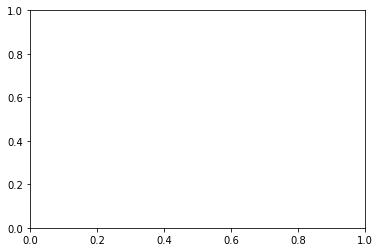

In [ ]:
import pandas as pd
import numpy as np
from numpy import arange
from sklearn.linear_model import LinearRegression
import sklearn.linear_model as lm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import sklearn.metrics as sm
from sklearn import metrics
import csv

products = ['Caprese Sandwich','Breakfast Burrito Egg Beans & Rice','Everything Bagel','Blueberry Scone',
            'Butter Croissant','Chocolate Croissant','Cinnamon Roll','Cookie - Chocolate Chunk','Egg| Spinach & Cheddar Sandwich on Ciabatta',
            'Danish - Classic Cheese','Croissant - White Cheddar Jalapeno','Coffee Cake with Streusel','Almond Croissant']

for n in range(len(products)):

  data = local_df

  ### Split-out validation dataset
  array = data.values 
  m = array.shape[0]

  stop = 4691  ## 0~4690 is '18'
  count = 0
  temp1 = []
  s = products[n]
  for i in range(stop):
    if array[i,2] == s:
      temp1.append(array[i,:])
      count +=1

  data1 = np.array(temp1)

  ###### select the feature ######
  Y = np.array(data1[:,6], dtype=float)

  X1 = np.array( [data1[:,5].flatten(), data1[:,7].flatten(), data1[:,8].flatten(), data1[:,9].flatten(),
                data1[:,10].flatten(), data1[:,11].flatten(), data1[:,12].flatten(), data1[:,13].flatten(),
                data1[:,14].flatten(), data1[:,15].flatten(), data1[:,16].flatten()] , dtype=float).T

  #holiday/weekday/tempmax/tempmin/temp/condition
  X2 = np.array( [data1[:,11].flatten(), data1[:,12].flatten(), data1[:,13].flatten(),
                data1[:,14].flatten(), data1[:,15].flatten(), data1[:,16].flatten()] , dtype=float).T

  #holiday/weekday/temp/condition
  X3 = np.array( [data1[:,11].flatten(), data1[:,12].flatten(), data1[:,15].flatten(), data1[:,16].flatten()] , dtype=float).T

  for i in range(X2.shape[0]):
    if X2[i,5] == 4:
      X2[i,5] = 3

  for i in range(X3.shape[0]):
    if X3[i,3] == 4:
      X3[i,3] = 3

  ############

  # Create Training and Test Split
  X_train, X_test, Y_train, Y_test = train_test_split(X3, Y, test_size=0.2)
  #
  # Linear model
  LR = lm.LinearRegression().fit(X_train, Y_train)
  # Make predictions using the testing set
  Y_pred = LR.predict(X_test)
  
  print()
  print('Store: 18',)
  print('Product: ',products[n])
  print(f"R2 score: {sm.r2_score(Y_test, Y_pred)}")
  print("MAE: ",metrics.mean_absolute_error(Y_test, Y_pred))
  #print('coefficient:')
  #print(LR.coef_)

  #Loading future data
  data_F = pd.read_csv("/content/drive/MyDrive/store18_empty.csv", sep=',')

  ### Split-out dataset
  array_F = data_F.values 
  m_F = array_F.shape[0]

  X_F = np.array( [array_F[:,11].flatten(), array_F[:,12].flatten(), array_F[:,15].flatten(), array_F[:,16].flatten()] ).T

  for i in range(X_F.shape[0]):
    condition = X_F[i,-1]
    if condition == 'Clear':
      X_F[i,-1] = 1
    if condition == 'Partially cloudy':
      X_F[i,-1] = 2
    if condition[:4] == 'Rain':
      X_F[i,-1] = 3
    if condition == 'Overcast':
      X_F[i,-1] = 5

  #make prediction
  YF_pred = LR.predict(X_F)
  for i in range(YF_pred.shape[0]):
    YF_pred[i] = round(YF_pred[i])
  
  print('Predict future sales(2020-6-30 - 2021-6-29):')
  print(YF_pred)


###LR model for store 117

In [ ]:
import pandas as pd
import numpy as np
from numpy import arange
from sklearn.linear_model import LinearRegression
import sklearn.linear_model as lm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import sklearn.metrics as sm
from sklearn import metrics
import csv

products = ['Caprese Sandwich','Breakfast Burrito Egg Beans & Rice','Everything Bagel','Blueberry Scone',
            'Butter Croissant','Chocolate Croissant','Cinnamon Roll','Cookie - Chocolate Chunk','Egg| Spinach & Cheddar Sandwich on Ciabatta',
            'Danish - Classic Cheese','Croissant - White Cheddar Jalapeno','Coffee Cake with Streusel','Almond Croissant']

for n in range(len(products)):

  data = local_df

  ### Split-out validation dataset
  array = data.values 
  m = array.shape[0]

  stop = 4715  ## 4691~9405 is '117'
  count = 0
  temp1 = []
  s = products[n]
  for i in range(stop):
    if array[i+4691,2] == s:
      temp1.append(array[i,:])
      count +=1

  data1 = np.array(temp1)

  ###### select the feature ######
  Y = np.array(data1[:,6], dtype=float)

  X1 = np.array( [data1[:,5].flatten(), data1[:,7].flatten(), data1[:,8].flatten(), data1[:,9].flatten(),
                data1[:,10].flatten(), data1[:,11].flatten(), data1[:,12].flatten(), data1[:,13].flatten(),
                data1[:,14].flatten(), data1[:,15].flatten(), data1[:,16].flatten()] , dtype=float).T

  #holiday/weekday/tempmax/tempmin/temp/condition
  X2 = np.array( [data1[:,11].flatten(), data1[:,12].flatten(), data1[:,13].flatten(),
                data1[:,14].flatten(), data1[:,15].flatten(), data1[:,16].flatten()] , dtype=float).T

  #holiday/weekday/temp/condition
  X3 = np.array( [data1[:,11].flatten(), data1[:,12].flatten(), data1[:,15].flatten(), data1[:,16].flatten()] , dtype=float).T

  for i in range(X2.shape[0]):
    if X2[i,5] == 4:
      X2[i,5] = 3

  for i in range(X3.shape[0]):
    if X3[i,3] == 4:
      X3[i,3] = 3

  ############

  # Create Training and Test Split
  X_train, X_test, Y_train, Y_test = train_test_split(X3, Y, test_size=0.2)
  #
  # Linear model
  LR = lm.LinearRegression().fit(X_train, Y_train)
  # Make predictions using the testing set
  Y_pred = LR.predict(X_test)
  
  print()
  print('Store: 117',)
  print('Product: ',products[n])
  print(f"R2 score: {sm.r2_score(Y_test, Y_pred)}")
  print("MAE: ",metrics.mean_absolute_error(Y_test, Y_pred))
  #print('coefficient:')
  #print(LR.coef_)


  #Loading future data
  data_F = pd.read_csv("/content/drive/MyDrive/store117_empty.csv", sep=',')

  ### Split-out dataset
  array_F = data_F.values 
  m_F = array_F.shape[0]

  X_F = np.array( [array_F[:,11].flatten(), array_F[:,12].flatten(), array_F[:,15].flatten(), array_F[:,16].flatten()] ).T

  for i in range(X_F.shape[0]):
    condition = X_F[i,-1]
    if condition == 'Clear':
      X_F[i,-1] = 1
    if condition == 'Partially cloudy':
      X_F[i,-1] = 2
    if condition[:4] == 'Rain':
      X_F[i,-1] = 3
    if condition == 'Overcast':
      X_F[i,-1] = 5

  #make prediction
  YF_pred = LR.predict(X_F)
  for i in range(YF_pred.shape[0]):
    YF_pred[i] = round(YF_pred[i])
  
  print('Predict future sales(2020-6-30 - 2021-6-29):')
  print(YF_pred)


Store: 117
Product:  Caprese Sandwich
R2 score: 0.027925311433184663
MAE:  2.0595838953898915
Predict future sales(2020-6-30 - 2021-6-29):
[3. 3. 3. 4. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 4. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 4. 3. 4. 3. 3. 3. 3. 3. 3. 4. 4. 3. 3. 3. 3. 3. 3. 4. 3.
 3. 3. 3. 3. 4. 3. 3. 3. 3. 3. 4. 4. 3. 3. 4. 3. 3. 4. 4. 3. 3. 3. 3. 3.
 3. 3. 4. 3. 3. 3. 3. 3. 3. 3. 4. 3. 3. 3. 3. 3. 3. 3. 4. 3. 3. 3. 4. 4.
 3. 3. 3. 3. 3. 3. 4. 3. 3. 3. 3. 3. 3. 3. 4. 3. 3. 3. 3. 4. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 4. 3. 3. 3. 3. 3. 4. 4. 3. 3. 4. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.

###LR model for store 332

In [ ]:
import pandas as pd
import numpy as np
from numpy import arange
from sklearn.linear_model import LinearRegression
import sklearn.linear_model as lm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import sklearn.metrics as sm
from sklearn import metrics
import csv

products = ['Caprese Sandwich','Breakfast Burrito Egg Beans & Rice','Everything Bagel','Blueberry Scone',
            'Butter Croissant','Chocolate Croissant','Cinnamon Roll','Cookie - Chocolate Chunk','Egg| Spinach & Cheddar Sandwich on Ciabatta',
            'Danish - Classic Cheese','Croissant - White Cheddar Jalapeno','Coffee Cake with Streusel','Almond Croissant']

for n in range(len(products)):

  data = local_df

  ### Split-out validation dataset
  array = data.values 
  m = array.shape[0]

  stop = 4717  ## 9406~14122 is '332'
  count = 0
  temp1 = []
  s = products[n]
  for i in range(stop):
    if array[i+9406,2] == s:
      temp1.append(array[i,:])
      count +=1

  data1 = np.array(temp1)

  ###### select the feature ######
  Y = np.array(data1[:,6], dtype=float)

  X1 = np.array( [data1[:,5].flatten(), data1[:,7].flatten(), data1[:,8].flatten(), data1[:,9].flatten(),
                data1[:,10].flatten(), data1[:,11].flatten(), data1[:,12].flatten(), data1[:,13].flatten(),
                data1[:,14].flatten(), data1[:,15].flatten(), data1[:,16].flatten()] , dtype=float).T

  #holiday/weekday/tempmax/tempmin/temp/condition
  X2 = np.array( [data1[:,11].flatten(), data1[:,12].flatten(), data1[:,13].flatten(),
                data1[:,14].flatten(), data1[:,15].flatten(), data1[:,16].flatten()] , dtype=float).T

  #holiday/weekday/temp/condition
  X3 = np.array( [data1[:,11].flatten(), data1[:,12].flatten(), data1[:,15].flatten(), data1[:,16].flatten()] , dtype=float).T

  for i in range(X2.shape[0]):
    if X2[i,5] == 4:
      X2[i,5] = 3

  for i in range(X3.shape[0]):
    if X3[i,3] == 4:
      X3[i,3] = 3

  ############

  # Create Training and Test Split
  X_train, X_test, Y_train, Y_test = train_test_split(X3, Y, test_size=0.2)
  #
  # Linear model
  LR = lm.LinearRegression().fit(X_train, Y_train)
  # Make predictions using the testing set
  Y_pred = LR.predict(X_test)
  
  print()
  print('Store: 332',)
  print('Product: ',products[n])
  print(f"R2 score: {sm.r2_score(Y_test, Y_pred)}")
  print("MAE: ",metrics.mean_absolute_error(Y_test, Y_pred))
  #print('coefficient:')
  #print(LR.coef_)


  #Loading future data
  data_F = pd.read_csv("/content/drive/MyDrive/store332_empty.csv", sep=',')

  ### Split-out dataset
  array_F = data_F.values 
  m_F = array_F.shape[0]

  X_F = np.array( [array_F[:,11].flatten(), array_F[:,12].flatten(), array_F[:,15].flatten(), array_F[:,16].flatten()] ).T

  for i in range(X_F.shape[0]):
    condition = X_F[i,-1]
    if condition == 'Clear':
      X_F[i,-1] = 1
    if condition == 'Partially cloudy':
      X_F[i,-1] = 2
    if condition[:4] == 'Rain':
      X_F[i,-1] = 3
    if condition == 'Overcast':
      X_F[i,-1] = 5

  #make prediction
  YF_pred = LR.predict(X_F)
  for i in range(YF_pred.shape[0]):
    YF_pred[i] = round(YF_pred[i])
  
  print('Predict future sales(2020-6-30 - 2021-6-29):')
  print(YF_pred)


Store: 332
Product:  Caprese Sandwich
R2 score: -0.06163560456788253
MAE:  2.209645566379493
Predict future sales(2020-6-30 - 2021-6-29):
[3. 3. 3. 4. 3. 4. 4. 3. 3. 3. 3. 4. 4. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 4. 4. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 4. 4. 4.
 4. 4. 4. 3. 3. 4. 4. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 4. 4. 3. 3. 4.
 4. 3. 4. 3. 4. 4. 4. 4. 4. 4. 3. 3. 3. 4. 3. 3. 3. 3. 4. 3. 4. 4. 4. 4.
 4. 4. 3. 3. 3. 3. 3. 3. 4. 4. 4. 4. 4. 4. 4. 3. 3. 3. 3. 3. 2. 3. 3. 4.
 4. 4. 4. 4. 4. 4. 3. 3. 3. 3. 3. 3. 3. 4. 4. 4. 4. 3. 4. 4. 4. 3. 3. 4.
 4. 3. 3. 3. 3. 3. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 3. 3. 3. 3. 3. 3. 4. 3.
 4. 4. 3. 4. 4. 4. 4. 3. 3. 3. 4. 3. 3. 3. 3. 4. 3. 4. 4. 3. 3. 3. 3. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 3. 3. 3. 3. 3. 3. 3. 3. 3. 4. 3. 3. 4. 4.
 3. 3. 3. 3. 4. 4. 3. 3. 2. 3. 3. 3. 3. 3. 3. 3. 3. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 3. 4. 4. 4. 3. 3. 4. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 4. 3. 4. 3.
 4. 4. 3. 4. 3. 3. 4. 4. 3. 3. 4. 4. 3. 3. 3. 3. 3. 4. 3. 

## Comparing the four different kind of models



## Functions

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

model_scores = {}

def get_scores(unscaled_df, original_df, model_name):
    rmse = np.sqrt(mean_squared_error(original_df.sales[-12:], unscaled_df.pred_value[-12:]))
    mae = mean_absolute_error(original_df.sales[-12:], unscaled_df.pred_value[-12:])
    r2 = r2_score(original_df.sales[-12:], unscaled_df.pred_value[-12:])
    model_scores[model_name] = [rmse, mae, r2]

    print(f"RMSE: {rmse}")
    print(f"MAE: {mae}")
    print(f"R2 Score: {r2}")

In [ ]:
import seaborn as sns

def plot_results(results, original_df, model_name):

    fig, ax = plt.subplots(figsize=(15,5))
    sns.lineplot(original_df.date, original_df.sales, data=original_df, ax=ax, 
                 label='Original', color='mediumblue')
    sns.lineplot(results.date, results.pred_value, data=results, ax=ax, 
                 label='Predicted', color='Red')
    
    ax.set(xlabel = "Date",
           ylabel = "Sales",
           title = f"{model_name} Sales Forecasting Prediction")
    
    ax.legend()
    
    sns.despine()
    
    plt.savefig(f'../model_output/{model_name}_forecast.png')

#### Random Forest

In [ ]:
import matplotlib.pyplot as plt 
from sklearn.ensemble import RandomForestClassifier
from numpy import random
from matplotlib import cm
from datetime import datetime, timedelta
from sklearn.ensemble import GradientBoostingClassifier
from pandas.tseries.holiday import USFederalHolidayCalendar

future_blank_df = pd.DataFrame(columns = local_df.columns)
start_date = datetime(2020, 6, 30) 
print(start_date)

cal = USFederalHolidayCalendar()
holidays = cal.holidays(start='2018-01-01', end='2022-12-31').to_pydatetime()
for i in range(0, 365):
    date = start_date + timedelta(days=i) 
    holiday = 0
    weekday = 1
    if(date.weekday() == 5 or date.weekday() == 6):
        weekday = 0
    if(date in holidays):
        holiday = 1
    
    
    future_blank_df = future_blank_df.append({'BusinessDate': str(date).split(" ")[0], 'Holiday': holiday, 'Weekday': weekday}, ignore_index=True)

future_blank_df.to_csv('blank_future_data.csv')

capreseSandwichData =  local_df.loc[local_df['Description'] == 'Caprese Sandwich'] 
#select the holiday, weekend and temperature features we will be testing on
features = local_df.columns[11:17]
#get the dataframe data from those columns
x = capreseSandwichData[features]
#get the sold qualitys
y = capreseSandwichData.SoldQuantity

#seperate the features and target datas in half so we can train on them
X_train = x[:int(len(capreseSandwichData) * .8)]
X_test = x[int(len(capreseSandwichData) * .2):]
Y_train = y[:int(len(capreseSandwichData) * .8)]
Y_test = y[int(len(capreseSandwichData) * .2):]

X_full = x
Y_full = y

2020-06-30 00:00:00


Optimal Training Values
Score:  0.7857142857142857
N Estimator:  62
Depth:  19


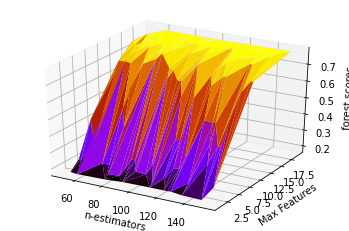

In [ ]:
n_estimators = []
forest_scores = []
max_depths = []
i = 0
for i in range(50,155):
    depth = random.randint(1,20)
    forest_test = RandomForestClassifier(n_estimators=i, max_depth=depth, random_state=0).fit(X_train, Y_train)
    forest_score = forest_test.score(X_test, Y_test)
    n_estimators.append(i)
    forest_scores.append(forest_score)
    max_depths.append(depth)
    
ax = plt.figure().add_subplot(projection='3d')

max_value = max(forest_scores) 
max_index = forest_scores.index(max_value)
print("Optimal Training Values")
print("Score: ", forest_scores[max_index])
print("N Estimator: ", n_estimators[max_index])
print("Depth: ", max_depths[max_index])

ax.plot_trisurf(n_estimators,max_depths,forest_scores, linewidth=.5, cmap=cm.gnuplot)
ax.set_xlabel('n-estimators')
ax.set_zlabel('forest scores')
ax.set_ylabel('Max Features')

plt.show()

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

products = local_df['Description'].unique()
scores = {}
min_product = ''
max_product = ''
min_score = 100
max_score = 0

for product in products:
    productData =  local_df.loc[local_df['Description'] == product] 

    #select the holiday, weekend and temperature features we will be testing on
    features = ['Holiday', 'Weekday','tempmin','tempmax', 'temp',  'conditions']

    #get the dataframe data from those columns
    x = productData[features]

    #get the sold qualitys
    y = productData.SoldQuantity

    #seperate the features and target datas in half so we can train on them
    X_train = x[:int(len(productData) * .8)]
    X_test = x[int(len(productData) * .2):]
    Y_train = y[:int(len(productData) * .8)]
    Y_test = y[int(len(productData) * .2):]

    X_full = x
    Y_full = y
    forest_test = RandomForestClassifier(n_estimators=70, max_depth =19 ,max_features=6, random_state=13).fit(X_train, Y_train)
    forest_score = forest_test.score(X_test, Y_test)
    scores[product] = forest_score
    if forest_score < min_score: 
        min_score = forest_score
        min_product = product
    if forest_score > max_score: 
        max_score = forest_score
        max_product = product


    y_pred = forest_test.predict(X_test)
    y_actual = Y_test.tolist()
    i = 0
    true_positive_rate = 0.0
    true_negative_rate = 0.0
    for y in y_pred:
        if(y == y_actual[i]):
            true_positive_rate += 1
        else:
            true_negative_rate += 1
        i+=1
        

    
    total = true_positive_rate + true_negative_rate

    true_positive_rate = true_positive_rate/total * 100
    true_negative_rate = true_negative_rate/total * 100

    print("Metrics for product ", product)
    print("Accuracy:", forest_score)
    print("True Positive Rate:", true_positive_rate)
    print("True Negative Rate:", true_negative_rate)
    print("F1-Score: ", f1_score(y_actual, y_pred, average='macro'))
    print("Confusion Matrix")
    print(confusion_matrix(y_actual, y_pred))



values = scores.values()
print(" {} this is the product with the least score of {} and this product :\
      {} has the greatest score of {}".format(min_product,min_score,max_product,max_score))
print("this is the average score {}".format(sum(values)/len(values)))

Metrics for product  Caprese Sandwich
Accuracy: 0.7755102040816326
True Positive Rate: 77.55102040816327
True Negative Rate: 22.448979591836736
F1-Score:  0.8159967904743763
Confusion Matrix
[[69  1  4  0  0  0  0  0  0  0  0  0  0]
 [ 2 75  9  2  0  0  1  0  0  0  0  0  1]
 [ 4  4 77  1  2  1  1  0  2  0  0  0  0]
 [11  4  4 51  1  1  4  2  0  0  1  0  0]
 [ 1  4  7  3 37  1  3  0  1  1  0  0  0]
 [ 4  1  9  3  0 36  0  1  0  1  0  0  0]
 [ 2  2  5  3  1  1 42  0  0  0  0  0  0]
 [ 2  0  2  1  0  0  0 24  0  0  0  0  0]
 [ 4  0  2  1  0  1  0  0 17  1  0  0  0]
 [ 0  1  0  0  0  0  0  0  0 16  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  6  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  3  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  3]]
Metrics for product  Breakfast Burrito Egg Beans & Rice
Accuracy: 0.7619047619047619
True Positive Rate: 76.19047619047619
True Negative Rate: 23.809523809523807
F1-Score:  0.46979070629786635
Confusion Matrix
[[ 79   3   0   0   1   1   0   0   0   0   0]
 [  2

In [ ]:
#creating the model with those optimal values
locations = ["332", "117", "18"]


for location in locations:
    forest_test = RandomForestClassifier(n_estimators=70, max_depth=19, random_state=0).fit(X_full, Y_full)
    future_blank_df = pd.DataFrame(columns = local_df.columns)
    default_table = pd.read_csv('/content/drive/MyDrive/store' + location + '_empty.csv')
    days = default_table['BusinessDate'].unique()
    features = default_table.columns[11:17]
    x = capreseSandwichData[features]
    y_pred = forest_test.predict(x)
    i = 0
    df_columns = local_df.columns 

    caprese_future_df = pd.DataFrame(columns = df_columns)

    for day in days:
        caprese_future_df = caprese_future_df.append({'BusinessDate': default_table[(default_table['BusinessDate'] == day)].BusinessDate.item(), 'Holiday': default_table[(default_table['BusinessDate'] == day)].Holiday.item(), 'Weekday': default_table[(default_table['BusinessDate'] == day)].Weekday.item(), 'PredictedSales': y_pred[i] }, ignore_index=True)
        i+=1
    new_file_name = 'caprese_future_data_random_forest_' + location + '.csv'
    caprese_future_df.to_csv(new_file_name)

#### Gradient Boosting Machine

Optimal Training Values
Score:  0.5732122587968218
N Estimator:  94
Depth:  19


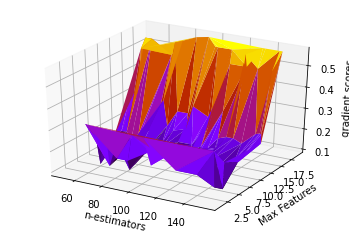

In [ ]:
#figuring out optimal data values
n_estimators = []
gradient_scores = []
max_depths = []
i = 0
for i in range(50,155):
    depth = random.randint(1,20)
    
    gradientBoost = GradientBoostingClassifier(n_estimators=i, learning_rate=.2, max_depth=depth, random_state=0).fit(X_train, Y_train)
    gradient_score = gradientBoost.score(X_test, Y_test)
    n_estimators.append(i)
    gradient_scores.append(gradient_score)
    max_depths.append(depth)
    
ax = plt.figure().add_subplot(projection='3d')

max_value = max(gradient_scores) 
max_index = gradient_scores.index(max_value)
print("Optimal Training Values")
print("Score: ", gradient_scores[max_index])
print("N Estimator: ", n_estimators[max_index])
print("Depth: ", max_depths[max_index])

ax.plot_trisurf(n_estimators,max_depths,gradient_scores, linewidth=.5, cmap=cm.gnuplot)
ax.set_xlabel('n-estimators')
ax.set_zlabel('gradient scores')
ax.set_ylabel('Max Features')

plt.show()


In [ ]:
products = local_df['Description'].unique()
scores = {}
min_product = ''
max_product = ''
min_score = 100
max_score = 0

gradient_scores = []
for product in products:
    productData =  local_df.loc[local_df['Description'] == product] 

    #select the holiday, weekend and temperature features we will be testing on
    features = ['Holiday', 'Weekday','tempmin','tempmax', 'temp',  'conditions']

    #get the dataframe data from those columns
    x = productData[features]

    #get the sold qualitys
    y = productData.SoldQuantity

    #seperate the features and target datas in half so we can train on them
    X_train = x[:int(len(productData) * .8)]
    X_test = x[int(len(productData) * .2):]
    Y_train = y[:int(len(productData) * .8)]
    Y_test = y[int(len(productData) * .2):]

    X_full = x
    Y_full = y
    
    gradientBoost = GradientBoostingClassifier(n_estimators=55, learning_rate=.2, max_depth=19, random_state=0).fit(X_train, Y_train)
    gradient_score = gradientBoost.score(X_test, Y_test)
    gradient_scores.append(gradient_score)
    scores[product] = gradient_score
    if gradient_score < min_score: 
        min_score = gradient_score
        min_product = product
    if gradient_score > max_score: 
        max_score = gradient_score
        max_product = product
        y_pred = forest_test.predict(X_test)
    y_actual = Y_test.tolist()
    i = 0
    true_positive_rate = 0.0
    true_negative_rate = 0.0
    for y in y_pred:
        try:
          if(y == y_actual[i]):
              true_positive_rate += 1
          else:
              true_negative_rate += 1
          i+=1
        except:
          continue

    
    total = true_positive_rate + true_negative_rate

    true_positive_rate = true_positive_rate/total * 100
    true_negative_rate = true_negative_rate/total * 100
    print("Metrics for product ", product)
    print("Accuracy:", gradient_score)
    print("True Positive Rate:", true_positive_rate)
    print("True Negative Rate:", true_negative_rate)
    print("F1-Score: ", f1_score(y_actual, y_pred, average='macro'))
    print("Confusion Matrix")
    print(confusion_matrix(y_actual, y_pred))
values = scores.values()
print(" {} this is the product with the least score of {} and this product :\
      {} has the greatest score of {}".format(min_product,min_score,max_product,max_score))
print("this is the average score {}".format(sum(values)/len(values)))

    

Metrics for product  Caprese Sandwich
Accuracy: 0.7806122448979592
True Positive Rate: 13.435374149659864
True Negative Rate: 86.56462585034014
F1-Score:  0.12105613617850516
Confusion Matrix
[[ 6 10 13  9 14  5  9  3  4  1  0  0  0]
 [ 1 12 16 11 18 11 11  4  4  1  1  0  0]
 [ 0  6 10 12 15 19 22  2  5  1  0  0  0]
 [ 0  4  7 12 11 15 18  3  6  3  0  0  0]
 [ 1  2  6  7 10  7  7  6  8  2  2  0  0]
 [ 0  1  0  3  8 12 12  6  5  5  2  1  0]
 [ 1  0  1  2  9  6  5  7 17  4  2  2  0]
 [ 0  0  0  1  5  5  3  3  9  1  1  0  1]
 [ 0  0  2  3  3  5  3  2  6  0  2  0  0]
 [ 0  0  0  0  0  3  3  4  4  2  1  0  0]
 [ 0  0  0  1  0  0  2  2  1  0  0  0  0]
 [ 0  0  0  0  0  0  1  1  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  1  1  0  1  0]]
Metrics for product  Breakfast Burrito Egg Beans & Rice
Accuracy: 0.7619047619047619
True Positive Rate: 8.503401360544217
True Negative Rate: 91.49659863945578
F1-Score:  0.05568530754120092
Confusion Matrix
[[ 3 11 11 17 12  6 11  4  3  4  2  0  0]
 [ 2  7 19

ValueError: ignored

In [ ]:
#creating the model with those optimal values
locations = ["332", "117", "18"]


for location in locations:
    gradientBoost = GradientBoostingClassifier(n_estimators=150, learning_rate=.2, max_depth=6, random_state=0).fit(X_full, Y_full)
    future_blank_df = pd.DataFrame(columns = local_df.columns)
    default_table = pd.read_csv('/content/drive/MyDrive/store' + location + '_empty.csv')
    days = default_table['BusinessDate'].unique()
    features = default_table.columns[11:17]
    x = capreseSandwichData[features]
    y_pred = gradientBoost.predict(x)
    i = 0
    df_columns = local_df.columns
    caprese_future_df = pd.DataFrame(columns = df_columns)

    for day in days:
        caprese_future_df = caprese_future_df.append({'BusinessDate': default_table[(default_table['BusinessDate'] == day)].BusinessDate.item(), 'Holiday': default_table[(default_table['BusinessDate'] == day)].Holiday.item(), 'Weekday': default_table[(default_table['BusinessDate'] == day)].Weekday.item(), 'PredictedSales': y_pred[i], 'StoreID': '332' }, ignore_index=True)
        i+=1
    new_file_name = 'caprese_future_data_gradient_boost_' + location + '.csv'
    caprese_future_df.to_csv(new_file_name)

#### Light GBM

#### XGBoost

In [ ]:
def getModel(name):
    #get the values for the specific name
    ProductData =  local_df.loc[local_df['Description'] == name] 
    #select the holiday, weekend and temperature features we will be testing on
    features = local_df.columns[11:17]
    #get the dataframe data from those columns
    x = ProductData[features]
    #get the sold qualitys
    y = ProductData.SoldQuantity

    #seperate the features and target datas in half so we can train on them
    X_train = x[:int(len(ProductData) * .8)]
    X_test = x[int(len(ProductData) * .2):]
    Y_train = y[:int(len(ProductData) * .8)]
    Y_test = y[int(len(ProductData) * .2):]

    X_full = x
    Y_full = y
    
    return X_train, Y_train, X_test, Y_test


In [ ]:
import xgboost as xg
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

def classify(xTrain, yTrain, xTest, yTest):
    XGBBoost = xg.XGBClassifier().fit(xTrain, yTrain)

    y_pred = XGBBoost.predict(xTest)
    y_actual = yTest.tolist()
    i = 0
    true_positive_rate = 0.0
    true_negative_rate = 0.0
    for y in y_pred:

        if(y == y_actual[i]):
            true_positive_rate += 1
        else:
            true_negative_rate += 1
        i+=1



    total = true_positive_rate + true_negative_rate
    true_positive_rate = true_positive_rate/total * 100
    true_negative_rate = true_negative_rate/total * 100

    print("True Positive Rate: ", true_positive_rate, "%")
    print("True Negative Rate: ", true_negative_rate, "%")
    print("F1-Score: ", f1_score(y_actual, y_pred, average='macro'))
    print("Confusion Matrix")
    print(confusion_matrix(y_actual, y_pred))

    return XGBBoost


In [ ]:
X_train, Y_train, X_test, Y_test = getModel('Caprese Sandwich')
XGB = classify(X_train, Y_train, X_test, Y_test)

True Poisitive Rate:  43.24631101021566 %
True Negative Rate:  56.75368898978434 %
F1-Score:  0.3081359137388639
Confusion Matrix
[[101  55  11   1   0   0   2   0   0   0   0   0   0]
 [ 24 175  19   1   0   0   0   1   0   0   0   0   0]
 [ 30  58  70   0   0   0   1   0   0   1   0   0   0]
 [ 22  47   7   4   1   0   0   1   0   0   0   0   0]
 [ 12  24  18   1   1   0   0   0   0   0   0   0   0]
 [ 10  23  14   0   0   6   0   0   0   0   0   0   0]
 [ 11  24  13   0   0   0   8   0   0   0   0   0   0]
 [  7  10   2   0   0   0   0  10   0   0   0   0   0]
 [  3  11   9   1   0   1   0   1   0   0   0   0   0]
 [  2   6   7   0   0   0   0   0   0   2   0   0   0]
 [  0   2   1   1   0   0   0   0   0   0   2   0   0]
 [  0   1   0   0   0   0   0   0   0   0   0   2   0]
 [  2   1   0   0   0   0   0   0   0   0   0   0   0]]


,Holiday,Weekday,temp,tempmin,tempmax,conditions
0,False,False,71.3,59.6,83.3,1
13,False,False,73.0,62.8,82.5,1
26,False,True,72.6,63.8,81.5,1
39,False,True,71.1,64.1,79.6,1
51,False,True,69.8,64.6,76.9,2
...,...,...,...,...,...,...
11239,False,False,71.5,55.3,90.6,1
11252,False,True,73.3,61.2,93.5,1
11265,False,True,67.5,60.2,83.0,3
11278,False,True,58.5,55.9,62.3,3


In [ ]:
# this will be an experiment to test synthetic data on the XGBoost Model
X_syn = syn_data['Caprese Sandwich'][0]
#X_syn.drop(['ReceivedQuantity', 'EndQuantity', 'LatestOrder', 'StockedOut', 'MissedSales'], axis=1, inplace=True)
X_syn

,Holiday,Weekday,temp,tempmin,tempmax,conditions
0,True,True,68.222304,68.737778,77.414844,1
1,True,True,54.287247,64.324897,92.690919,1
2,True,True,60.313611,71.623390,87.257224,2
3,True,True,62.734738,63.296987,76.504295,2
4,True,True,53.030329,64.332583,78.295376,1
...,...,...,...,...,...,...
1551,False,True,78.300000,70.700000,88.200000,1
1552,False,False,76.700000,67.500000,87.100000,1
1553,False,False,76.200000,68.700000,86.100000,1
1554,False,True,78.900000,69.600000,89.700000,1


In [ ]:
X_train

,Holiday,Weekday,temp,tempmin,tempmax,conditions
0,False,False,71.3,59.6,83.3,1
13,False,False,73.0,62.8,82.5,1
26,False,True,72.6,63.8,81.5,1
39,False,True,71.1,64.1,79.6,1
51,False,True,69.8,64.6,76.9,2
...,...,...,...,...,...,...
11239,False,False,71.5,55.3,90.6,1
11252,False,True,73.3,61.2,93.5,1
11265,False,True,67.5,60.2,83.0,3
11278,False,True,58.5,55.9,62.3,3


In [ ]:
new_train = pd.concat([X_train, X_syn], ignore_index=True)
new_train

,Holiday,Weekday,temp,tempmin,tempmax,conditions
0,False,False,71.3,59.6,83.3,1
1,False,False,73.0,62.8,82.5,1
2,False,True,72.6,63.8,81.5,1
3,False,True,71.1,64.1,79.6,1
4,False,True,69.8,64.6,76.9,2
...,...,...,...,...,...,...
2431,False,True,78.3,70.7,88.2,1
2432,False,False,76.7,67.5,87.1,1
2433,False,False,76.2,68.7,86.1,1
2434,False,True,78.9,69.6,89.7,1


In [ ]:
y_syn = syn_data['Caprese Sandwich'][1]
y_syn.dtype

dtype('int64')

In [ ]:
type(y_syn)

pandas.core.series.Series

In [ ]:
new_y = pd.concat([Y_train, y_syn], ignore_index=True)
new_y

0       1
1       0
2       2
3       4
4       2
       ..
2431    1
2432    1
2433    1
2434    9
2435    5
Name: SoldQuantity, Length: 2436, dtype: int64

In [ ]:
syn_XGB = classify(new_train, new_y, X_test, Y_test)

True Poisitive Rate:  41.43019296254257 %
True Negative Rate:  58.56980703745743 %
F1-Score:  0.2781227941107542
Confusion Matrix
[[ 99  51  19   1   0   0   0   0   0   0   0   0   0]
 [ 40 152  27   0   1   0   0   0   0   0   0   0   0]
 [ 26  52  82   0   0   0   0   0   0   0   0   0   0]
 [ 25  41   7   7   1   0   0   1   0   0   0   0   0]
 [ 10  23  15   2   6   0   0   0   0   0   0   0   0]
 [ 14  20  14   0   0   5   0   0   0   0   0   0   0]
 [ 17  23  11   1   0   1   3   0   0   0   0   0   0]
 [ 10   7   7   1   0   0   0   4   0   0   0   0   0]
 [  6   8   9   0   0   0   0   1   2   0   0   0   0]
 [  4   5   6   0   0   0   0   0   0   2   0   0   0]
 [  0   3   1   0   0   0   0   0   0   0   2   0   0]
 [  0   2   1   0   0   0   0   0   0   0   0   0   0]
 [  1   1   0   0   0   0   0   0   0   0   0   0   1]]


In [ ]:
all_syn_XGB = classify(X_syn, y_syn, X_test, Y_test)

True Poisitive Rate:  38.592508513053346 %
True Negative Rate:  61.407491486946654 %
F1-Score:  0.206855751445013
Confusion Matrix
[[105  41  24   0   0   0   0   0   0   0   0   0   0]
 [ 52 134  30   2   0   0   0   1   0   1   0   0   0]
 [ 38  51  70   0   0   0   0   1   0   0   0   0   0]
 [ 30  30  13   8   1   0   0   0   0   0   0   0   0]
 [ 10  17  20   1   8   0   0   0   0   0   0   0   0]
 [ 14  19  13   0   1   5   0   0   1   0   0   0   0]
 [ 17  22  13   1   0   1   1   0   1   0   0   0   0]
 [ 10   5   8   2   1   0   0   3   0   0   0   0   0]
 [  5  10   5   0   0   0   0   1   5   0   0   0   0]
 [  9   2   6   0   0   0   0   0   0   0   0   0   0]
 [  1   1   3   0   0   0   0   0   0   0   1   0   0]
 [  0   2   1   0   0   0   0   0   0   0   0   0   0]
 [  1   1   1   0   0   0   0   0   0   0   0   0   0]]


In [ ]:
import matplotlib.pyplot as plt

xg.plot_importance(XGB)
plt.rcParams['figure.figsize'] = [5,5]
plt.show()

# ? print(rmse)

NameError: ignored

#### LSTM 

In [ ]:
# leaving this for future work possibly 

from keras.layers import Dense
from keras.models import Sequential
from keras.layers import LSTM

def lstm_model(X_train, y_train, X_test, y_test):
    model = Sequential()
    model.add(LSTM(4, batch_input_shape=(1, X_train.shape[1], X_train.shape[2]), 
                   stateful=True))
    model.add(Dense(1))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(X_train, y_train, epochs=200, batch_size=1, verbose=1, 
              shuffle=False)
    predictions = model.predict(X_test,batch_size=1)
    
    get_scores(predictions, y_test, 'LSTM')
    
    plot_results(predictions, local_df, 'LSTM')


#Chapter 3: Inventory Optimization

##Optimization 1 - Finding optimal stock increase on cold days for sweet bakery items

#### Optimizing Bakery Item Stocking on day with 20% coldest temperatures

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.ensemble import RandomForestClassifier
from numpy import random
from matplotlib import cm
import numpy as np
from datetime import datetime, timedelta
from sklearn.ensemble import GradientBoostingClassifier
from pandas.tseries.holiday import USFederalHolidayCalendar
from sklearn.model_selection import train_test_split
from matplotlib.pyplot import cm

local_df = pd.read_csv('sprint2_local.csv')
local_df['Weekday'] = local_df['Weekday'].astype(bool)
local_df['Holiday'] = local_df['Holiday'].astype(bool)
local_df.shape

In [ ]:
def trainModelsForTemperatureOptimization():
    results = []
    
    
    #these are the items we are selecting to optimize
    #The sweet bakery items
    #then we have the Croissant White Cheddar Jalapeno for the control non sweet group
    bakery_items = [ 'Blueberry Scone', 'Butter Croissant',
     'Chocolate Croissant', 'Cinnamon Roll'
     , 'Danish - Classic Cheese',
     'Croissant - White Cheddar Jalapeno', 'Coffee Cake with Streusel',
     'Almond Croissant']

    temperature_standard_deviation = 20

    
    for item in bakery_items:
        print("Creating Model for ", item)
        itemData =  local_df.loc[local_df['Description'] == item] 
        features = local_df.columns[11:17]
        x = itemData[features]
        y = itemData.LatestOrder

        #create the test and train data

        X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

        #then have a full value for the final model once the optimal values are found
        X_full = x
        Y_full = y


        #We first create the model to make the synthetic data for the order amounts
        n_estimators = []
        gradient_scores = []
        max_depths = []
        i = 0
        #this loop will create multiple models creating an optimal n optimizor value and depth value
        for i in range(50,155):

            depth = random.randint(1,20)
            predictOrderAmounts = GradientBoostingClassifier(n_estimators=i, max_depth=depth, random_state=0).fit(X_train, Y_train)

            #predictOrderAmounts = GradientBoostingClassifier(n_estimators=i, learning_rate=.2, max_depth=depth, random_state=0).fit(X_train, Y_train)
            gradient_score = predictOrderAmounts.score(X_test, Y_test)
            n_estimators.append(i)
            gradient_scores.append(gradient_score)
            max_depths.append(depth)    
        #once the optimal modle is found print the data out
        ax = plt.figure().add_subplot(projection='3d')

        max_value = max(gradient_scores) 
        max_index = gradient_scores.index(max_value)
        print("Optimal Training Values for Predict Stock Amount", item)
        print("Score: ", gradient_scores[max_index])
        print("N Estimator: ", n_estimators[max_index])
        print("Depth: ", max_depths[max_index])

        ax.plot_trisurf(n_estimators,max_depths,gradient_scores, linewidth=.5, cmap=cm.gnuplot)
        ax.set_xlabel('n-estimators')
        ax.set_zlabel('gradient scores')
        ax.set_ylabel('Max Features')
        plt.show()
        
        #then use those optimal values to create the model for the synthetic order data
        predictOrderAmountsModel = GradientBoostingClassifier(n_estimators=n_estimators[max_index], max_depth=max_depths[max_index], random_state=0).fit(X_full, Y_full)


        stores = ['18','117', '332']
        result_add = []

        #here we loop through every posible increase amount
        for increaseAmount in range(1,9):
            for store in stores:
                #for each store pull the future emtpy data
                empty_df = pd.read_csv('store' + store + '_empty.csv')
                empty_df['Weekday'] = empty_df['Weekday'].astype(bool)
                empty_df['Holiday'] = empty_df['Holiday'].astype(bool)
                empty_df.shape


                features = empty_df.columns[11:17]


                itemData =  empty_df.loc[empty_df['StoreID'] == int(store)] 


                #get the dataframe data from those columns
                x = itemData[features]

                X_full = x
                i = 0
                
                #here we create the synthetic order amount data
                predictedOrderAmounts = predictOrderAmountsModel.predict(X_full)
                df_columns = local_df.columns
                future_df = pd.DataFrame(columns = df_columns)
                days = empty_df['BusinessDate'].unique()
                temps = empty_df['temp'].unique()
                temp_coldests = np.percentile(temps, temperature_standard_deviation)


                #then fill and place holder csv file with the predicted order amount

                for day in days:
                    if(int(empty_df[(empty_df['BusinessDate'] == day)].temp.item()) <= temp_coldests):
                        future_df = future_df.append({'BusinessDate': empty_df[(empty_df['BusinessDate'] == day)].BusinessDate.item(), 
                                                              'Holiday': empty_df[(empty_df['BusinessDate'] == day)].Holiday.item(), 
                                                              'Weekday': empty_df[(empty_df['BusinessDate'] == day)].Weekday.item(), 
                                                              'tempmax': empty_df[(empty_df['BusinessDate'] == day)].tempmax.item(),
                                                              'tempmin': empty_df[(empty_df['BusinessDate'] == day)].tempmin.item(),
                                                                'temp': empty_df[(empty_df['BusinessDate'] == day)].temp.item(),
                                                                'conditions': empty_df[(empty_df['BusinessDate'] == day)].conditions.item(),

                                                              'ReceivedQuantity': predictedOrderAmounts[i], 'StoreID': store }, 
                                                             ignore_index=True)
                    i+=1
                    
                #write the synthetic order data to a file
                new_file_name = 'store' + store + '_predicted_recieved.csv'
                future_df.to_csv(new_file_name)
                future_df2 = pd.DataFrame(columns = df_columns)

                i = 0
                
                #then we create a second csv with synthetic data but with increaesed values of the stock
                for day in days:
                    predicted_stock = predictedOrderAmounts[i]
                    if(int(empty_df[(empty_df['BusinessDate'] == day)].temp.item()) <= temp_coldests):
                        predicted_stock = str(int(predictedOrderAmounts[i]) + (int(predictedOrderAmounts[i]) * (increaseAmount/10)))

                        future_df2 = future_df2.append({'BusinessDate': empty_df[(empty_df['BusinessDate'] == day)].BusinessDate.item(), 
                                                              'Holiday': empty_df[(empty_df['BusinessDate'] == day)].Holiday.item(), 
                                                              'Weekday': empty_df[(empty_df['BusinessDate'] == day)].Weekday.item(), 
                                                              'tempmax': empty_df[(empty_df['BusinessDate'] == day)].tempmax.item(),
                                                              'tempmin': empty_df[(empty_df['BusinessDate'] == day)].tempmin.item(),
                                                                'temp': empty_df[(empty_df['BusinessDate'] == day)].temp.item(),
                                                                'conditions': empty_df[(empty_df['BusinessDate'] == day)].conditions.item(),

                                                              'ReceivedQuantity': predicted_stock, 'StoreID': store }, 
                                                             ignore_index=True)
                    i+=1
                new_file_name = 'store' + store + '_predicted_recieved_increased_stock.csv'
                future_df2.to_csv(new_file_name)



                #now we need to create a model to predict the sold based on request amount on temps
                itemData =  local_df.loc[local_df['Description'] == item] 
                features = local_df.columns[[5,15,16]]

                x = itemData[features]
                y = itemData.SoldQuantity

                X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)


                X_full = x
                Y_full = y

                #figuring out optimal data values
                n_estimators = []
                gradient_scores = []
                max_depths = []
                i = 0
                for i in range(50,155):

                    depth = random.randint(1,20)
                    predictSoldBasedOnRequesed = GradientBoostingClassifier(n_estimators=i, max_depth=depth, random_state=0).fit(X_train, Y_train)

                    #predictOrderAmounts = GradientBoostingClassifier(n_estimators=i, learning_rate=.2, max_depth=depth, random_state=0).fit(X_train, Y_train)
                    gradient_score = predictSoldBasedOnRequesed.score(X_test, Y_test)
                    n_estimators.append(i)
                    gradient_scores.append(gradient_score)
                    max_depths.append(depth)    
                ax = plt.figure().add_subplot(projection='3d')

                max_value = max(gradient_scores) 
                max_index = gradient_scores.index(max_value)
                print("Optimal Training Values for Predict Stock Amount", item)
                print("Score: ", gradient_scores[max_index])
                print("N Estimator: ", n_estimators[max_index])
                print("Depth: ", max_depths[max_index])

                ax.plot_trisurf(n_estimators,max_depths,gradient_scores, linewidth=.5, cmap=cm.gnuplot)
                ax.set_xlabel('n-estimators')
                ax.set_zlabel('gradient scores')
                ax.set_ylabel('Max Features')
                plt.show()
                
                #here the model that predicts the sold amount is created, using the optimal values from the model training loop

                predictSoldBasedOnRequesedModel = GradientBoostingClassifier(n_estimators=n_estimators[max_index], max_depth=max_depths[max_index], random_state=0).fit(X_full, Y_full)

                #open the first synthetic dataframe
                file_name = 'store' + store + '_predicted_recieved.csv'
                empty_df = pd.read_csv(file_name)
                empty_df['Weekday'] = empty_df['Weekday'].astype(bool)
                empty_df['Holiday'] = empty_df['Holiday'].astype(bool)
                empty_df.shape

                features = empty_df.columns[[6,16,17]]


                itemData =  empty_df.loc[empty_df['StoreID'] == int(store)] 
                nonOptimized = itemData['temp'].to_numpy()


                #get the dataframe data from those columns
                x = itemData[features]
                regularStock = itemData['ReceivedQuantity'].to_numpy()

                X_full = x
                #predict the proper values
                predictedSalesNoOptimizer = predictSoldBasedOnRequesedModel.predict(X_full)
                #open the optimized dataframe
                file_name = 'store' + store + '_predicted_recieved_increased_stock.csv'
                empty_df = pd.read_csv(file_name)
                empty_df['Weekday'] = empty_df['Weekday'].astype(bool)
                empty_df['Holiday'] = empty_df['Holiday'].astype(bool)
                empty_df.shape
                increasedStock = itemData['ReceivedQuantity'].to_numpy()

                features = empty_df.columns[[6,16,17]]


                itemData =  empty_df.loc[empty_df['StoreID'] == int(store)] 

                #get the dataframe data from those columns
                x = itemData[features]

                X_full = x

                temps = itemData['temp'].to_numpy()
                dates = itemData['BusinessDate'].to_numpy()

                #predict the sale data
                predictedSalesOptimized = predictSoldBasedOnRequesedModel.predict(X_full)
                
                #add all information to the results array for further analysis
                result_add.append([store,[predictedSalesNoOptimizer, predictedSalesOptimized],temps, dates,[regularStock, increasedStock], increaseAmount])





        results.append([item,[result_add]])
    return results


In [ ]:
def VisualizeTemeratureOptimizatoin():
    results = trainModelsForTemperatureOptimization

    for item in results:
        print(item[0])


        for stores in item[1]:
            topIncrease = [0,0,0]
            topModel = [[],[],[]]
            j = 0
            for store in stores:
                increase = ((np.sum(store[1][1]) - np.sum(store[1][0]))/np.sum(store[1][0])) * 100
                optimized_profit = (np.sum(store[1][1]) * 3) - (np.sum(store[4][1]) * .5) 
                unomtimized_profit = (np.sum(store[1][0]) * 3) - (np.sum(store[4][0]) * .5)

                profitPercentIncrase = ((optimized_profit - unomtimized_profit)/unomtimized_profit) * 100
                if(topIncrease[j] == 0):
                    topIncrease[j] = increase
                    topModel[j] = store
                if(increase > topIncrease[j]):
                    topIncrease[j] = increase
                    topModel[j] = store
                j+= 1
                if(j == 3):
                    j = 0




            for store in topModel:

                print("Store: ", store[0])



                increase = ((np.sum(store[1][1]) - np.sum(store[1][0]))/np.sum(store[1][0])) * 100
                if(increase == ' nan '):
                    increase = 0

                print("Percent in Sale Increase: ", increase , "%")


                optimized_profit = (np.sum(store[1][1]) * 3) - (np.sum(store[4][1]) * .5) 
                unomtimized_profit = (np.sum(store[1][0]) * 3) - (np.sum(store[4][0]) * .5)

                if(unomtimized_profit != 0):
                    profitPercentIncrase = ((optimized_profit - unomtimized_profit)/unomtimized_profit) * 100
                else:
                    profitPercentIncrase = 0
                print("Profit Increase: ", profitPercentIncrase , "%")

                print("Stock increase: ", store[5]* 10, "%")


                x = store[1][0]
                y = store[1][1]
                width = 0.3
                plt.figure(figsize=(30, 5))

                y_pos = np.arange(len(store[3]) )

                plt.xticks(y_pos, store[3], fontsize='12' , rotation=90, horizontalalignment='left')

                plt.title('Non Optimized vs Optimized Sale by day')

                plt.xlabel("Date")
                plt.ylabel("Sales")

                plt.bar(np.arange(len(x)), x, width=width , label = "Non Optimized Sales")
                plt.bar(np.arange(len(y))+ width, y, width=width, label = "Optimized Sales" )

                plt.legend()
                plt.show()

                organizedTemps = []
                organizedSalesOptimized = []
                organizedSalesNonOptimized = []

                for i in range(0, len(store[2])):
                    if(store[2][i] in organizedTemps):
                        organizedSalesOptimized[organizedTemps.index(store[2][i])] += store[1][1][i]
                        organizedSalesNonOptimized[organizedTemps.index(store[2][i])] += store[1][0][i]

                    else:
                        organizedTemps.append(store[2][i])
                        organizedSalesOptimized.append(store[1][1][i])
                        organizedSalesNonOptimized.append(store[1][0][i])

                n = len(organizedTemps)
                for i in range(n-1):
                    for j in range(0, n-i-1):
                        if organizedTemps[j] > organizedTemps[j + 1] :
                            organizedTemps[j], organizedTemps[j + 1] = organizedTemps[j + 1], organizedTemps[j]
                            organizedSalesOptimized[j], organizedSalesOptimized[j + 1] = organizedSalesOptimized[j + 1], organizedSalesOptimized[j]
                            organizedSalesNonOptimized[j], organizedSalesNonOptimized[j + 1] = organizedSalesNonOptimized[j + 1], organizedSalesNonOptimized[j]



                x = organizedSalesNonOptimized
                y = organizedSalesOptimized
                width = 0.3
                plt.figure(figsize=(30, 5))

                y_pos = np.arange(len(organizedTemps) )

                plt.xticks(y_pos, organizedTemps, fontsize='12' , rotation=90, horizontalalignment='left')

                plt.title('Non Optimized vs Optimized Sale by temperature')

                plt.xlabel("Temperature")
                plt.ylabel("Sales")

                plt.bar(np.arange(len(x)), x, width=width , label = "Non Optimized Sales")
                plt.bar(np.arange(len(y))+ width, y, width=width, label = "Optimized Sales" )

                plt.legend()
                plt.show()

                days = []
                for date in store[3]:
                    datesplit = date.split('/')
                    date_true = datetime(int(datesplit[2]), int(datesplit[0]), int(datesplit[1]))
                    days.append(date_true.weekday())



                organizedTemps = store[2]
                organizedSalesOptimized = store[1][1]
                organizedSalesNonOptimized = store[1][0]

                organizedStockOptimized = store[4][1]
                organizedStockNonOptimized = store[4][0]    


                n = len(organizedTemps)
                for i in range(n-1):
                    for j in range(0, n-i-1):
                        if organizedTemps[j] > organizedTemps[j + 1] :
                            organizedTemps[j], organizedTemps[j + 1] = organizedTemps[j + 1], organizedTemps[j]
                            organizedSalesOptimized[j], organizedSalesOptimized[j + 1] = organizedSalesOptimized[j + 1], organizedSalesOptimized[j]
                            organizedSalesNonOptimized[j], organizedSalesNonOptimized[j + 1] = organizedSalesNonOptimized[j + 1], organizedSalesNonOptimized[j]
                            days[j], days[j + 1] = days[j + 1], days[j]
                            organizedStockOptimized[j], organizedStockOptimized[j + 1] = organizedStockOptimized[j + 1], organizedStockOptimized[j]
                            organizedStockNonOptimized[j], organizedStockNonOptimized[j + 1] = organizedStockNonOptimized[j + 1], organizedStockNonOptimized[j]


                twodimension = []
                tempaxis = []
                dateaxis = [0,1,2,3,4,5,6]
                for i in range(0, len(store[2])):
                    if (round(organizedTemps[i]) in tempaxis):
                        twodimension[tempaxis.index(round(organizedTemps[i]))][days[i]] += (( (organizedSalesOptimized[i] * 3) - (organizedStockOptimized[i]* .5) ) - ((organizedSalesNonOptimized[i] * 3) - (organizedStockNonOptimized[i] * .5))) 

                    else:
                        tempaxis.append(round(organizedTemps[i]))
                        twodimension.append([0,0,0,0,0,0,0])

                        twodimension[tempaxis.index(round(organizedTemps[i]))][days[i]] = (( (organizedSalesOptimized[i] * 3) - (organizedStockOptimized[i] * .5) ) - ((organizedSalesNonOptimized[i] * 3) - (organizedStockNonOptimized[i] * .5))) 


                dateaxistext = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

                fig, ax = plt.subplots(figsize=(15,40))

                im = ax.imshow(twodimension, cmap=cm.Wistia)


                plt.xticks(np.arange(len(dateaxistext) ), dateaxistext, fontsize='12' , rotation=90)
                plt.yticks(np.arange(len(tempaxis) ), tempaxis, fontsize='12' )

                for i in range(len(tempaxis)):
                    for j in range(len(dateaxistext)):
                        text = ax.text(j, i, twodimension[i][j],
                                       ha="center", va="center", color="black", fontsize='20')

                ax.set_title("Optimzed Profit Increase on Day/Temperature")

                plt.show()                 


##Optimization 2 Using Rolling Average with XGBoost to Forecast and Minimize Stockouts

In [ ]:
# BASE
# ------------------------------------------------------
import numpy as np
import pandas as pd
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
import os
import gc
import warnings

# DATA VISUALIZATION
# ------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
pio.renderers.default='notebook'

# Machine Learning Libraries
# ------------------------------------------------------
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import tensorflow as tf



# CONFIGURATIONS
# ------------------------------------------------------
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
local_preprocess = pd.read_csv('./drive/MyDrive/Local_Coffee_Stores_Final.csv')
local_preprocess.head()

,StoreID,BusinessDate,Description,CategoryLvl2Desc,CategoryLvl3Desc,ReceivedQuantity,SoldQuantity,EndQuantity,LatestOrder,StockedOut,MissedSales,Weekday,temp,tempmin,tempmax,conditions,Holiday
0,18,2019-06-29,Caprese Sandwich,Cold Case,Ready to Eat,4,1,4,9,0,0.00,0.00,71.30,59.60,83.30,Clear,False
1,18,2019-06-29,Breakfast Burrito Egg Beans & Rice,Cold Case,Ready to Eat,1,2,1,21,0,0.00,0.00,71.30,59.60,83.30,Clear,False
2,18,2019-06-29,Everything Bagel,Bake Case,Bagels,6,4,0,16,0,0.00,0.00,71.30,59.60,83.30,Clear,False
3,18,2019-06-29,Blueberry Scone,Bake Case,Muffins & Scones,8,6,0,16,0,0.00,0.00,71.30,59.60,83.30,Clear,False
4,18,2019-06-29,Butter Croissant,Bake Case,Pastries,8,7,0,15,1,0.62,0.00,71.30,59.60,83.30,Clear,False


In [ ]:
all_stores = pd.read_csv('/content/drive/My Drive/National_Coffee_Stores_Final.csv')
all_stores.head()

,StoreID,BusinessDate,PLU,Description,ItemType,CategoryLvl1Desc,CategoryLvl2Desc,CategoryLvl3Desc,ReceivedQuantity,SoldQuantity,EndQuantity,LatestOrder,StockedOut,MissedSales,national_maxtemp_avg,Holiday
0,2,2019-06-29,3000227,Caprese Sandwich,Unassigned,Food,Cold Case,Ready to Eat,0.00,3.00,0.00,21,0,0.00,86.04,False
1,2,2019-06-29,830620,Honey Raisin Bran Muffin,Core,Food,Bake Case,Muffins & Scones,4.00,2.00,0.00,10,0,0.00,86.04,False
2,2,2019-06-29,12216,Vive Juice Shot,Unassigned,Food,Cold Case,Ready to Drink,0.00,0.00,27.00,0,0,0.00,86.04,False
3,2,2019-06-29,3000277,Mixed Berries & Granola Yogurt Parfait,Unassigned,Food,Cold Case,Ready to Eat,0.00,3.00,0.00,11,1,0.58,86.04,False
4,2,2019-06-29,3000278,Breakfast Burrito Egg Beans & Rice,Unassigned,Food,Cold Case,Ready to Eat,2.00,2.00,0.00,10,1,0.90,86.04,False


In [ ]:
for_vis = all_stores.copy()
for_vis = encode_dates(for_vis)

def sold_quantity():
    temp = for_vis.groupby(["Description", "BusinessDate"]).SoldQuantity.mean().reset_index()
    fig = px.line(temp.sort_values(["Description", "BusinessDate"]), x='BusinessDate', y='SoldQuantity', color='Description',title = f"Sold Quantity Average throughout the Year" )
    fig.show()

def dayofweek_avg_sold():     
    temp = for_vis.groupby(["dayofweek", "Description"]).SoldQuantity.mean().reset_index()
    fig = px.line(temp, x="dayofweek", y="SoldQuantity", color='Description', title = f"Day of Week average Sold Values")
    fig.show()

def xgboost_forecast(X_train, Y_train, X_test, Y_test):
    # prepare the data to be passed into the model
    matrix_train = xgb.DMatrix(X_train, label = Y_train)
    matrix_test = xgb.DMatrix(X_test, label = Y_test)
    # fit to the model
    model = xgb.train(params={'objective':'reg:linear','eval_metric':'mae', 'n_estimators':800, 'max_depth': 6, 
        'colsample_bylevel':0.8, 'learning_rate':0.02, 'random_state':10, 'colsample_bytree': 0.75, 'subsample': 1.0 
        }
                ,dtrain = matrix_train, num_boost_round = 800,
                early_stopping_rounds = 20, evals = [(matrix_test,'test')],)
    # make model predictions
    yhat = model.predict(matrix_test)
    return yhat, model

def compare_predictions(predictions, Y_test):
    for i in range(0, len(predictions), 50):
        fig = px.line(x=range(i, i + 50), y=[Y_test[i:i+50], predictions[i:i+50]])
        fig.show()


In [ ]:
# for some reason this does not show in google colab, chart is in report
sold_quantity()

NameError: ignored

In [ ]:
# for some reason this does not show in google colab, chart is in report
dayofweek_avg_sold()

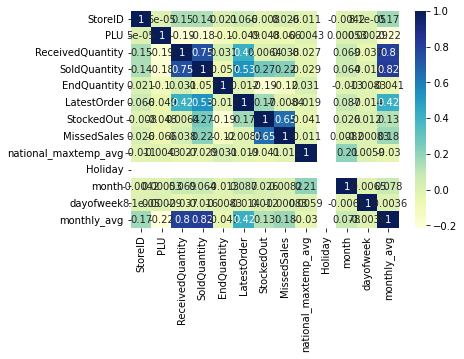

In [ ]:
dataplot = sns.heatmap(for_vis.corr(), cmap="YlGnBu", annot=True)
# displaying heatmap
plt.show()

In [ ]:
def one_hot_encode(df, column):
    df = df.copy()
    dummies = pd.get_dummies(df[column], prefix=column)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(column, axis=1)
    return df

def encode_dates(df):
    df = df.copy()
    dr = pd.date_range(start="2019-06-29", end="2020-06-29")
    cal = calendar()
    holidays = cal.holidays(start=dr.min(), end=dr.max())
    df["BusinessDate"] = pd.to_datetime(df["BusinessDate"])
    df['Holiday'] = df['BusinessDate'].dt.date.astype('datetime64').isin(holidays)
    df['month'] = df.BusinessDate.dt.month
    df['dayofweek'] = df.BusinessDate.dt.dayofweek+1
    # add daily_avg and monthly_avg
    # removed daily_avg unnecessary
    # df['daily_avg']  = df.groupby(['Description','StoreID','dayofweek'])['SoldQuantity'].transform('mean')
    df['monthly_avg'] = df.groupby(['Description','StoreID','month'])['SoldQuantity'].transform('mean')
    return df

def add_rolling_avg_wed(df):
    # adds a rolling average to the data assuming there is a delivery on Thursday so we get the data on wednesday\
    df = df.copy() 
    all_wednesday = df[df.dayofweek == 3]
    df["roll_avg"] = np.nan
    for date in all_wednesday.BusinessDate.unique():
        # iterate through all of the stores
        for store in df.StoreID.unique():
            # iterate through all of the items
            for item in df.Description.unique():
                # get three specific dates 
                past_dates = pd.date_range(end=date, periods=3)
                future_dates = pd.date_range(start=date, periods=4)
                # get the rolling average for the specific date
                ma  = df[(df.BusinessDate >= past_dates[0]) & (df.BusinessDate <= past_dates[2]) & (df.StoreID == store) & (df.Description == item)].SoldQuantity.rolling(3).mean().round(0).dropna()
                if ma.empty:
                    df.loc[(df.BusinessDate >= future_dates[0]) & (df.BusinessDate <= future_dates[3]) & (df.StoreID == store) & (df.Description == item), "roll_avg"] = df[df.Description == item].SoldQuantity.mean()
                else:
                    df.loc[(df.BusinessDate >= future_dates[0]) & (df.BusinessDate <= future_dates[3]) & (df.StoreID == store) & (df.Description == item), "roll_avg"] = ma.values[0]
    for item in df.Description.unique():
        df["roll_avg"] = df["roll_avg"].fillna(df[df.Description == item].SoldQuantity.mean())
    return df

def add_rolling_avg_sun(df):
    df = df.copy()
    all_Sunday = df[df.dayofweek == 7]
    for date in all_Sunday.BusinessDate.unique():
    # iterate through all of the stores
        for store in df.StoreID.unique():
            # iterate through all of the items
            for item in df.Description.unique():
                # get three specific dates 
                past_dates = pd.date_range(end=date, periods=4)
                future_dates = pd.date_range(start=date, periods=3)
                # get the rolling average for the specific date
                ma  = df[(df.BusinessDate >= past_dates[0]) & (df.BusinessDate <= past_dates[3]) & (df.StoreID == store) & (df.Description == item)].SoldQuantity.rolling(4).mean().round(0).dropna()
                if ma.empty:
                    df.loc[(df.BusinessDate >= future_dates[0]) & (df.BusinessDate <= future_dates[2]) & (df.StoreID == store) & (df.Description == item), "roll_avg"] = df[df.Description == item].SoldQuantity.mean()
                else:
                    df.loc[(df.BusinessDate >= future_dates[0]) & (df.BusinessDate <= future_dates[2]) & (df.StoreID == store) & (df.Description == item), "roll_avg"] = ma.values[0]
    for item in df.Description.unique():
        df["roll_avg"] = df["roll_avg"].fillna(df[df.Description == item].SoldQuantity.mean())
    return df

def add_rolling_avg_wed_all(df):
    # adds a rolling average to the data assuming there is a delivery on Thursday so we get the data on wednesday\
    df = df.copy() 
    all_wednesday = df[df.dayofweek == 3]
    df["roll_avg"] = np.nan
    for date in all_wednesday.BusinessDate.unique():
            # iterate through all of the items
            for item in df.Description.unique():
                # get three specific dates 
                past_dates = pd.date_range(end=date, periods=3)
                future_dates = pd.date_range(start=date, periods=4)
                # get the rolling average for the specific date
                ma  = df[(df.BusinessDate >= past_dates[0]) & (df.BusinessDate <= past_dates[2]) & (df.Description == item)].SoldQuantity.rolling(3).mean().round(0).dropna()
                if ma.empty:
                    df.loc[(df.BusinessDate >= future_dates[0]) & (df.BusinessDate <= future_dates[3]) & (df.Description == item), "roll_avg"] = df[df.Description == item].SoldQuantity.mean()
                else:
                    df.loc[(df.BusinessDate >= future_dates[0]) & (df.BusinessDate <= future_dates[3]) & (df.Description == item), "roll_avg"] = ma.values[0]
    for item in df.Description.unique():
        df["roll_avg"] = df["roll_avg"].fillna(df[df.Description == item].SoldQuantity.mean())
    return df

def add_rolling_avg_sun_all(df):
    df = df.copy()
    all_Sunday = df[df.dayofweek == 7]
    for date in all_Sunday.BusinessDate.unique():
        # iterate through all of the items
        for item in df.Description.unique():
            # get three specific dates 
            past_dates = pd.date_range(end=date, periods=4)
            future_dates = pd.date_range(start=date, periods=3)
            # get the rolling average for the specific date
            ma  = df[(df.BusinessDate >= past_dates[0]) & (df.BusinessDate <= past_dates[3]) & (df.Description == item)].SoldQuantity.rolling(4).mean().round(0).dropna()
            if ma.empty:
                df.loc[(df.BusinessDate >= future_dates[0]) & (df.BusinessDate <= future_dates[2]) & (df.Description == item), "roll_avg"] = df[df.Description == item].SoldQuantity.mean()
            else:
                df.loc[(df.BusinessDate >= future_dates[0]) & (df.BusinessDate <= future_dates[2]) & (df.Description == item), "roll_avg"] = ma.values[0]
    for item in df.Description.unique():
        df["roll_avg"] = df["roll_avg"].fillna(df[df.Description == item].SoldQuantity.mean())
    return df

def preprocess_inputs(df, local=False, n=0, forecast=False):
    df = df.copy()
    # drop unnecessary columns
    df = df.drop('CategoryLvl2Desc', axis=1)
    df = df.drop('CategoryLvl3Desc', axis=1)
    df = df.drop('ReceivedQuantity', axis=1)
    df = df.drop('EndQuantity', axis=1)
    df = df.drop('LatestOrder', axis=1)
    df = df.drop('StockedOut', axis=1)
    df = df.drop('MissedSales', axis=1)

    if local:
        df = df.drop('Weekday', axis=1)
        df = df.drop('temp', axis=1)
        df = df.drop('tempmin', axis=1)
    else:
        df = df.drop('PLU', axis=1)
        df = df.drop('ItemType', axis=1)
        df = df.drop('CategoryLvl1Desc', axis=1)

    # encode the dates
    df = encode_dates(df)

    # add rolling average
    if local or n > 0:
        df = add_rolling_avg_wed(df)
        df = add_rolling_avg_sun(df)
    else:
        # do this for all of stores regardless of storeID
        df = add_rolling_avg_wed_all(df)
        df = add_rolling_avg_sun_all(df)

    # drop date because no longer needed
    

    # one hot encode columns that should be one hot encoded
    df = one_hot_encode(df, "Description")
    df = one_hot_encode(df, "StoreID")
    if local:
        df = one_hot_encode(df, "conditions")
        

        
    if forecast:
        # get test will be from 2020-01-13 to 2020-03-13
        # train will be everything before
        train = df[(df.BusinessDate < "2020-01-12")]
        test = df[(df.BusinessDate >= "2020-01-12") & (df.BusinessDate < "2020-03-12")]
        y_train = train.SoldQuantity
        X_train = train.drop("SoldQuantity", axis=1)
        X_train = X_train.drop("BusinessDate", axis=1)
        y_test = test.SoldQuantity
        X_test = test.drop("SoldQuantity", axis=1)

    else:
        df = df.drop("BusinessDate", axis=1)
    # split into train test split
        y = df.SoldQuantity
        X = df.drop("SoldQuantity", axis=1)
        X_train, X_test, y_train, y_test = train_test_split(X, y,  random_state=42, test_size=0.2)

    return X_train, X_test, y_train, y_test

In [ ]:
# preprocess data with rolling avg to see xgboost performance
X_train, X_test, y_train, y_test = preprocess_inputs(local_preprocess, True)
local_predictions, local_model = xgboost_forecast(X_train, y_train, X_test, y_test)
error = mean_absolute_error(y_test, local_predictions)
test_r2 = r2_score(y_test, local_predictions)

print(f"Test R^2 Score: {test_r2:.3f}")
print(f"\nMean absolute error for Local {error:.3f}\n")

[03:59:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	test-mae:3.31966
Will train until test-mae hasn't improved in 20 rounds.
[1]	test-mae:3.25951
[2]	test-mae:3.20058
[3]	test-mae:3.14274
[4]	test-mae:3.08641
[5]	test-mae:3.03579
[6]	test-mae:2.98326
[7]	test-mae:2.93159
[8]	test-mae:2.88056
[9]	test-mae:2.83182
[10]	test-mae:2.78435
[11]	test-mae:2.73757
[12]	test-mae:2.69267
[13]	test-mae:2.64837
[14]	test-mae:2.60531
[15]	test-mae:2.56318
[16]	test-mae:2.52279
[17]	test-mae:2.48316
[18]	test-mae:2.44481
[19]	test-mae:2.40762
[20]	test-mae:2.37103
[21]	test-mae:2.33589
[22]	test-mae:2.30178
[23]	test-mae:2.26858
[24]	test-mae:2.23642
[25]	test-mae:2.2056
[26]	test-mae:2.17516
[27]	test-mae:2.14583
[28]	test-mae:2.11806
[29]	test-mae:2.0904
[30]	test-mae:2.06418
[31]	test-mae:2.0385
[32]	test-mae:2.01357
[33]	test-mae:1.99263
[34]	test-mae:1.96919
[35]	test-mae:1.94617
[36]	test-mae:1.92404
[37]	test-mae:1.

In [ ]:
# no rolling average because too time consuming
X_train_all, X_test_all, y_train_all, y_test_all = preprocess_inputs(all_stores)
all_predictions, all_stores_model = xgboost_forecast(X_train_all, y_train_all, X_test_all, y_test_all)
error = mean_absolute_error(y_test_all, all_predictions)
test_r2 = r2_score(y_test_all, all_predictions)

print(f"Test R^2 Score: {test_r2:.3f}")
print(f"\nMean absolute error for with StoreIDS taken account in rolling average and not one hot encoded {error:.3f}\n")

[04:07:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	test-mae:3.05986
Will train until test-mae hasn't improved in 20 rounds.
[1]	test-mae:3.00731
[2]	test-mae:2.95567
[3]	test-mae:2.91166
[4]	test-mae:2.86202
[5]	test-mae:2.81372
[6]	test-mae:2.77301
[7]	test-mae:2.72899
[8]	test-mae:2.68444
[9]	test-mae:2.65059
[10]	test-mae:2.60839
[11]	test-mae:2.56736
[12]	test-mae:2.52756
[13]	test-mae:2.48884
[14]	test-mae:2.46094
[15]	test-mae:2.42522
[16]	test-mae:2.39913
[17]	test-mae:2.36418
[18]	test-mae:2.33014
[19]	test-mae:2.30309
[20]	test-mae:2.27745
[21]	test-mae:2.25237
[22]	test-mae:2.2287
[23]	test-mae:2.19895
[24]	test-mae:2.17
[25]	test-mae:2.14195
[26]	test-mae:2.11464
[27]	test-mae:2.08812
[28]	test-mae:2.06239
[29]	test-mae:2.04586
[30]	test-mae:2.02174
[31]	test-mae:1.99836
[32]	test-mae:1.98101
[33]	test-mae:1.95844
[34]	test-mae:1.93672
[35]	test-mae:1.91571
[36]	test-mae:1.89528
[37]	test-mae:1.8

In [ ]:
items  = ['Description_Almond Croissant',
       'Description_Blueberry Scone',
       'Description_Breakfast Burrito Egg Beans & Rice',
       'Description_Butter Croissant', 'Description_Caprese Sandwich',
       'Description_Chocolate Croissant', 'Description_Cinnamon Roll',
       'Description_Coffee Cake with Streusel',
       'Description_Cookie - Chocolate Chunk',
       'Description_Croissant - White Cheddar Jalapeno',
       'Description_Danish - Classic Cheese',
       'Description_Egg| Spinach & Cheddar Sandwich on Ciabatta',
       'Description_Everything Bagel']

def get_dates_thursday(df, date):
     # get the monday
    thursday = date + pd.Timedelta(days=1)
    # get series of dates
    future_dates = pd.date_range(start=thursday, periods=4)
    # condition for dates
    mask = (df.BusinessDate >= future_dates[0]) & (df.BusinessDate <= future_dates[3])
    days_to_forecast = df.loc[mask]
    return days_to_forecast

def get_dates_monday(df, date):
     # get the monday
    monday = date + pd.Timedelta(days=1)
    # get series of dates
    future_dates = pd.date_range(start=monday, periods=3)
    # condition for dates
    mask = (df.BusinessDate >= future_dates[0]) & (df.BusinessDate <= future_dates[2])
    days_to_forecast = df.loc[mask]
    return days_to_forecast

def get_forecast(days, y_test, model, left_overs):
    inventory = np.zeros(13)
    actual = np.zeros(13)
    stockout = np.zeros(13)
    missed_sales = np.zeros(13)
    # order by items to sell match item list
    temp = days.sort_values(by=items, ascending=False)
    actual_range = y_test.loc[temp.index]
    matrix_test = xgb.DMatrix(temp.drop("BusinessDate", axis=1), label = actual_range)
    predictions = model.predict(matrix_test)
    for i in range(len(items)):
        # calculate inventory needed to accomadate delivery window
        inventory[i] = predictions[i*3 : i*3+3].sum().round() + 4
        actual[i] = actual_range[i*3 : i*3+3].sum()
    # determine inventory after delivery window
    left_overs = inventory - actual
    # determine if there was a stockout
    for i in range(len(items)):
        if left_overs[i] < 0:
            stockout[i] = 1
            missed_sales = left_overs[i] * -1
            left_overs[i] = 0
        else:
            stockout[i] = 0
    #print(stockout)
    #print(missed_sales)


    return left_overs, stockout, missed_sales

def make_forecast(model, X_test, y_test, n=3):
    # get evaluation days for window
    all_Sunday = X_test.BusinessDate[X_test.dayofweek == 7].unique()
    all_Wednesday = X_test.BusinessDate[X_test.dayofweek == 3].unique()
    # list of storeIDs
    storeIDs = X_test.columns[-1*n:]
    # the stock for each store 
    left_overs = np.zeros((n, 13))
    # saving the amount of stockouts
    all_stockout = np.empty(n, dtype=np.ndarray)
    all_missed_sales = np.empty(n, dtype=np.ndarray)
    dates = list()
    # bool to switch back and forth
    Sunday = True
    curr_date = all_Sunday[0]
    sun_i = 1
    wed_i = 0
    while sun_i < len(all_Sunday) and wed_i < len(all_Wednesday):
        if Sunday:
            # get predictions for the next three days
            days_to_forecast = get_dates_monday(X_test, curr_date)
            for i, storeID in enumerate(storeIDs):
                left_overs[i], stockout, missed_sales = get_forecast(days_to_forecast[days_to_forecast[storeID] == 1], y_test, model, left_overs[i])
                all_stockout[i] = np.append(all_stockout[i], stockout)
                all_missed_sales[i] = np.append(all_missed_sales[i], missed_sales)
            dates.append(curr_date)
            curr_date = all_Wednesday[wed_i]
            wed_i += 1
            Sunday = False
        else:
            days_to_forecast = get_dates_thursday(X_test, curr_date)
            for i, storeID in enumerate(storeIDs):
                left_overs[i], stockout, missed_sales = get_forecast(days_to_forecast[days_to_forecast[storeID] == 1], y_test, model, left_overs[i])
                all_stockout[i] = np.append(all_stockout[i], stockout)
                all_missed_sales[i] = np.append(all_missed_sales[i], missed_sales)
            dates.append(curr_date)
            curr_date = all_Sunday[sun_i]
            sun_i += 1
            Sunday = True
    return all_stockout, all_missed_sales

In [ ]:
# train and get back the model
X_train, X_test, y_train, y_test = preprocess_inputs(local_preprocess, local=True, n=len(local_preprocess.StoreID.unique()), forecast=True)
X_train, X_eval, y_train, y_eval = train_test_split(X_train, y_train,  random_state=42, test_size=0.15)
local_predictions, local_model = xgboost_forecast(X_train, y_train, X_eval, y_eval)
error = mean_absolute_error(y_eval, local_predictions)
test_r2 = r2_score(y_eval, local_predictions)

print(f"Test R^2 Score: {test_r2:.3f}")
print(f"\nMean absolute error training before forecast {error:.3f}\n")

# determine the amount of stockout and print the total by store
stockouts, missed_sales = make_forecast(local_model, X_test, y_test)
storeIDs = X_test.columns[-1*3:]
for i, storeID in enumerate(storeIDs):
    stockouts[i] = stockouts[i][1:]
    total = local_preprocess[(local_preprocess.BusinessDate >= "2020-01-12") & (local_preprocess.BusinessDate < "2020-03-16") & (local_preprocess.StockedOut == 1) & (local_preprocess.StoreID == int(storeID.split("_")[1]))].StockedOut.count()
    print(storeID, total)
    print(storeID, stockouts[i].sum())
print("Total number of stockouts with optimization",stockouts.sum().sum())
actual_total = local_preprocess[(local_preprocess.BusinessDate >= "2020-01-12") & (local_preprocess.BusinessDate < "2020-03-16") & (local_preprocess.StockedOut == 1)].StockedOut.count()
print("Number of stockouts from actual", actual_total)

# determine profit loss 
mean_sales_window = local_preprocess[(local_preprocess.BusinessDate >= "2020-01-12") & (local_preprocess.BusinessDate < "2020-03-16")].SoldQuantity.mean()
lossed_profit = mean_sales_window * .75 * 1156 * 2
optimized_loss_profit = mean_sales_window * .75 * 61 * 2
print("Estimated profit loss from stockout ", lossed_profit)
print("Optimized loss of profit            ", optimized_loss_profit)
print("Potential Savings",lossed_profit - optimized_loss_profit)

In [ ]:
#get the first 20 StoreIDs to use for a general model
first20 = all_stores.StoreID.unique()[:20]
national_stores20 = all_stores[all_stores.StoreID.isin(first20)]
national_stores20.StoreID.unique()

# preprocess the data and train the model
X_train_ns20, X_test_ns20, y_train_ns20, y_test_ns20 = preprocess_inputs(national_stores20, n=20, forecast=True)
X_train_ns20, X_eval_ns20, y_train_ns20, y_eval_ns20 = train_test_split(X_train_ns20, y_train_ns20,  random_state=42, test_size=0.15)
ns20_predictions, ns20_model = xgboost_forecast(X_train_ns20, y_train_ns20, X_eval_ns20, y_eval_ns20)
error = mean_absolute_error(y_eval_ns20, ns20_predictions)
test_r2 = r2_score(y_eval_ns20, ns20_predictions)

print(f"20 National Store Test R^2 Score: {test_r2:.3f}")
print(f"\n20 National Store Mean absolute error training before forecast {error:.3f}\n")

# determine the amount of stockout and print the total by store
ns20_stockouts, ns20_missed_sales = make_forecast(ns20_model, X_test_ns20, y_test_ns20, n=20)
storeIDs = X_test_ns20.columns[-1*20:]
for i, storeID in enumerate(storeIDs):
    ns20_stockouts[i] = ns20_stockouts[i][1:]
    total = national_stores20[(national_stores20.BusinessDate >= "2020-01-12") & (national_stores20.BusinessDate < "2020-03-16") & (national_stores20.StockedOut == 1) & (national_stores20.StoreID == int(storeID.split("_")[1]))].StockedOut.count()
    print("Before Optimization: ",storeID, total)
    print("Post Optimization:   ", storeID, ns20_stockouts[i].sum())
print("Total number of stockouts with optimization",ns20_stockouts.sum().sum())
actual_total = national_stores20[(national_stores20.BusinessDate >= "2020-01-12") & (national_stores20.BusinessDate < "2020-03-16") & (national_stores20.StockedOut == 1)].StockedOut.count()
print("Number of stockouts from actual", actual_total)

# determine profit loss 
mean_sales_window = national_stores20[(national_stores20.BusinessDate >= "2020-01-12") & (national_stores20.BusinessDate < "2020-03-16")].SoldQuantity.mean()
lossed_profit = mean_sales_window * .75 * 11572 * 2
optimized_loss_profit = mean_sales_window * .75 * 327 * 2
print("Estimated profit loss from stockout ", lossed_profit)
print("Optimized loss of profit            ", optimized_loss_profit)
print("Potential Savings",lossed_profit - optimized_loss_profit)

Chapter 3 Optimization 3: Increasing Stocking frequency/restock amount based on Category 3 Description for Local Stores.

In [ ]:
month = []
date = []
for i in range(len(local_df)):
    month.append(int(local_df['BusinessDate'][i][5:7]))
    date.append(int(local_df['BusinessDate'][i][8:10]))
    
local_df["Month"] = month
local_df["Date"] = date
local_df_stockedout = local_df.loc[local_df["StockedOut"] == 1]
products = local_df['Description'].unique()

descriptions = local_df['CategoryLvl3Desc'].unique()
category2 = local_df['CategoryLvl2Desc'].unique()

def category2_piechart(cate2,l_df_so):
    description_amount = []
    for category in cate2:
        new_desc = l_df_so.loc[l_df_so['CategoryLvl2Desc']==category]
       # print("{} is the number of times an item with the description '{}' is out of stock".format(len(new_desc),category))
        description_amount.append(len(new_desc))
    category_df = pd.DataFrame({'description_amount':description_amount},index = cate2)
    category_df.plot.pie(y='description_amount',figsize=(8,8),autopct='%1.0f%%')

def product_piechart(prods,l_df_so):
    StockedOutAmount = []
    ProductDescriptions = []
    for product in prods:
        new_desc = l_df_so.loc[l_df_so['Description'] == product]
        categorylvl3 = new_desc['CategoryLvl3Desc'].unique()[0]
       # print("{} is the number of times an item with the description '{}' is out of stock".format(len(new_desc),product))
        StockedOutAmount.append(len(new_desc))
        ProductDescriptions.append(categorylvl3)
    product_df = pd.DataFrame({'StockedOutAmount': StockedOutAmount, 'ProductDescriptions':ProductDescriptions}, index = products)
    product_df.groupby(['ProductDescriptions'])
    pie_chart = product_df.plot.pie(y='StockedOutAmount', figsize =(8,8),autopct='%1.0f%%')
    pie_chart.legend(loc='upper left',fontsize = 'xx-small')
# seems like pastries are more significanlty out of stock than other items
def productdesc_piechart(prods,l_df_so):
    StockedOutAmount = []
    ProductDescriptions = []
    
    for product in prods:
        new_desc = l_df_so.loc[l_df_so['Description'] == product]
        categorylvl3 = new_desc['CategoryLvl3Desc'].unique()[0]
        #print("{} is the number of times an item with the description '{}' is out of stock".format(len(new_desc),product))
        StockedOutAmount.append(len(new_desc))
        ProductDescriptions.append(categorylvl3)
    product_df = pd.DataFrame({'StockedOutAmount': StockedOutAmount, 'ProductDescriptions':ProductDescriptions}, index = ProductDescriptions)
    product_df.groupby(['ProductDescriptions'])
    pie_chart = product_df.plot.pie(y='StockedOutAmount', figsize =(8,8),autopct='%1.0f%%')
    pie_chart.legend(loc='upper left',fontsize = 'xx-small')

def desc_piechart(desc,l_df_so):
    DescriptionSOAmount = []

    for description in desc:
        new_desc = local_df_stockedout.loc[local_df_stockedout['CategoryLvl3Desc'] == description]
        #print("{} is the number of times an item with Category lvl 3 description '{}' is out of stock".format(len(new_desc),description))
        DescriptionSOAmount.append(len(new_desc))
    Description_df = pd.DataFrame({'DescriptionSOAmount':DescriptionSOAmount},index = desc)
    Description_df.plot.pie(y='DescriptionSOAmount',figsize=(8,8),autopct='%1.0f%%')

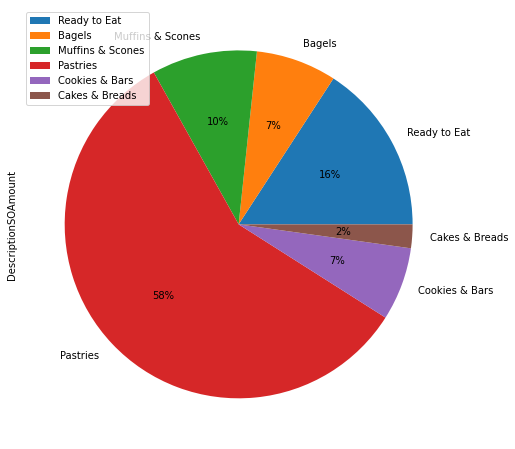

In [ ]:
desc_piechart(descriptions,local_df_stockedout)

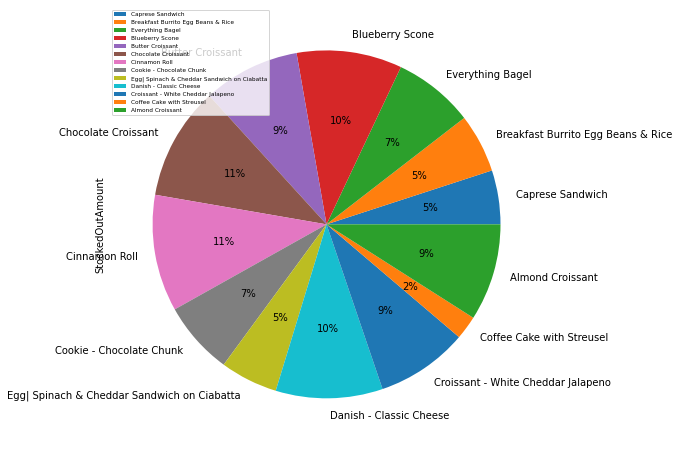

In [ ]:
product_piechart(products,local_df_stockedout)

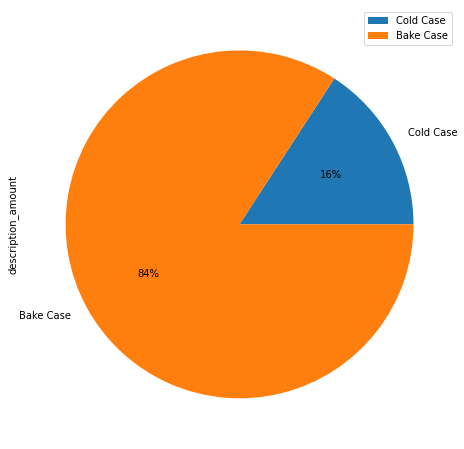

In [ ]:
category2_piechart(category2,local_df_stockedout)